# Sesi 1

In [1]:
!pip install PythonTsa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 13.8 MB/s eta 0:00:00


In [2]:
!pip install pandas openpyxl

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from google.colab import files
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_ljungbox
from scipy.stats import shapiro
import scipy.stats as stats
from PythonTsa.plot_acf_pacf import acf_pacf_fig
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox,  boxcox_llf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.sandbox.stats.runs import runstest_1samp
from statsmodels.stats.anova import anova_lm
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

## Pengenalan Pola Data Time Series


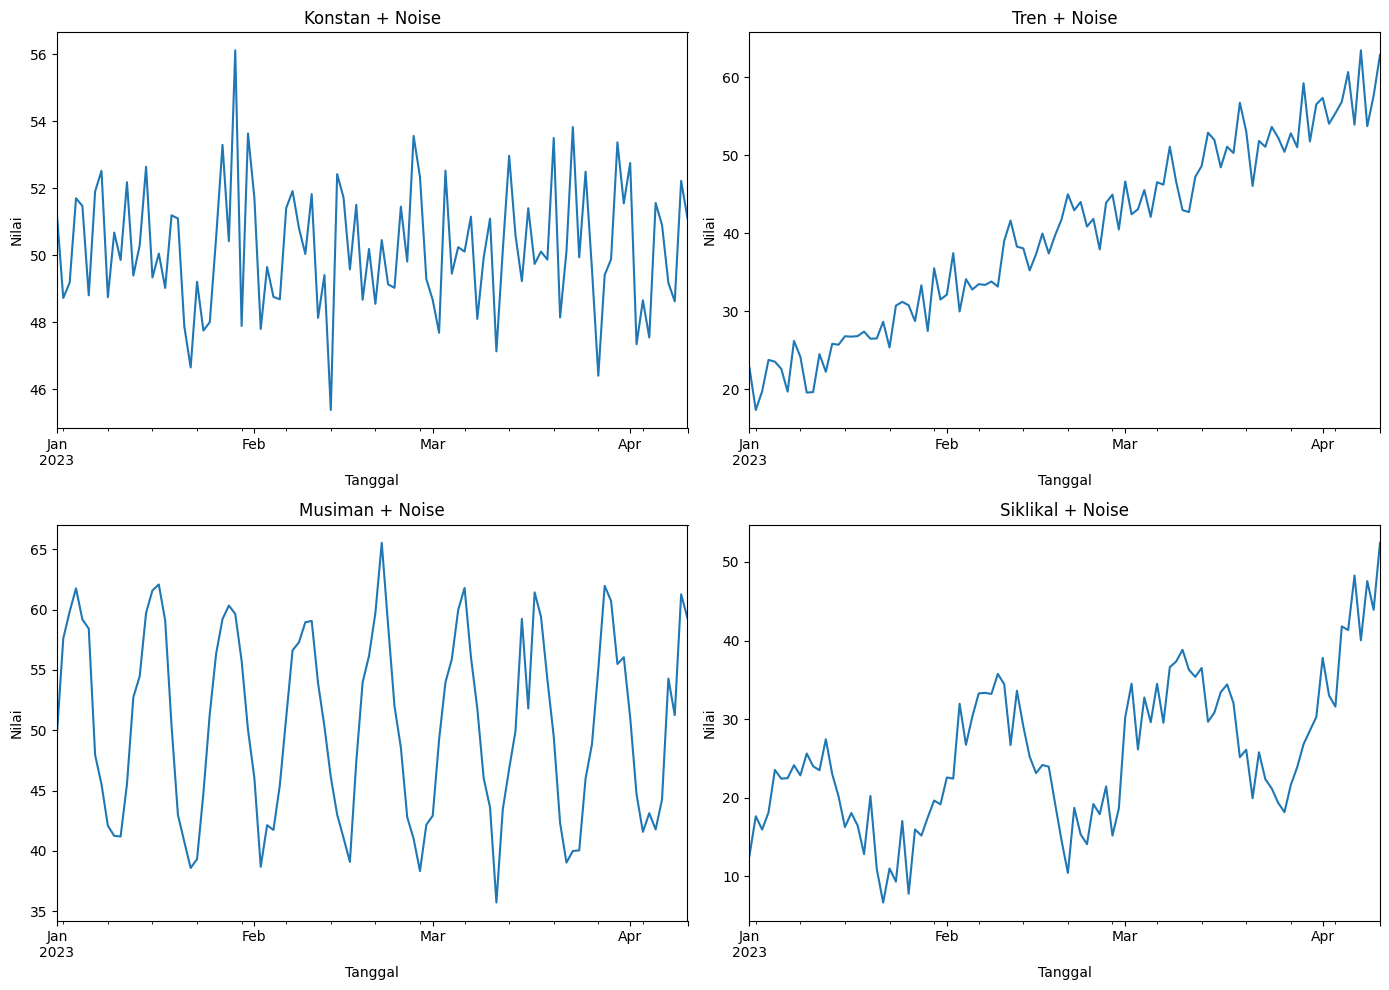

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(74)

# Buat index waktu harian selama 100 hari
time_index = pd.date_range(start='2023-01-01', periods=100, freq='D')

# 1. Pola Konstan + Fluktuasi
data_konstan = 50 + np.random.normal(0, 2, size=100)

# 2. Pola Tren + Fluktuasi
data_tren = 0.4 * np.arange(100) + 20 + np.random.normal(0, 3, size=100)

# 3. Pola Musiman + Fluktuasi
data_musiman = 10 * np.sin(2 * np.pi * np.arange(100) / 12) + 50 + np.random.normal(0, 2, size=100)

# 4. Pola Siklikal = tren + musiman + fluktuasi
data_siklik = 0.2 * np.arange(100) + 15 + 10 * np.sin(2 * np.pi * np.arange(100) / 30) + np.random.normal(0, 3, size=100)

# Masukkan ke dalam DataFrame
df = pd.DataFrame({
    'Konstan + Noise': data_konstan,
    'Tren + Noise': data_tren,
    'Musiman + Noise': data_musiman,
    'Siklikal + Noise': data_siklik
}, index=time_index)

# Visualisasi
plt.figure(figsize=(14, 10))

for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    df[col].plot()
    plt.title(col)
    plt.xlabel("Tanggal")
    plt.ylabel("Nilai")

plt.tight_layout()
plt.show()


### Membuat Plot Time Series Indeks Kualitas Udara dengan Input Data Github

In [5]:
!git clone https://github.com/yenniangraini/pelatihanTS.git

Cloning into 'pelatihanTS'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 47 (delta 15), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 4.53 MiB | 10.48 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [6]:
#untuk mengupdate isi github

# Masuk ke folder repo
%cd pelatihanTS

# Ambil update terbaru dari GitHub
!git pull

/content/pelatihanTS
Already up to date.


In [7]:
#input data dari github
url_1 = '/content/pelatihanTS/dataset aqi.xlsx'
data_1 = pd.read_excel(url_1)

In [8]:
data_1.head()

,Kualitas_udara,Time
0,145.0,2019-01-06 09:00:00
1,114.0,2019-01-06 10:00:00
2,113.0,2019-01-06 11:00:00
3,104.0,2019-01-06 12:00:00
4,72.0,2019-01-06 13:00:00


In [9]:
# Parsing tanggal
data_1['Time'] = pd.to_datetime(data_1['Time'])
data_1.set_index('Time', inplace=True)
data_1.head()

,Kualitas_udara
Time,
2019-01-06 09:00:00,145.0
2019-01-06 10:00:00,114.0
2019-01-06 11:00:00,113.0
2019-01-06 12:00:00,104.0
2019-01-06 13:00:00,72.0


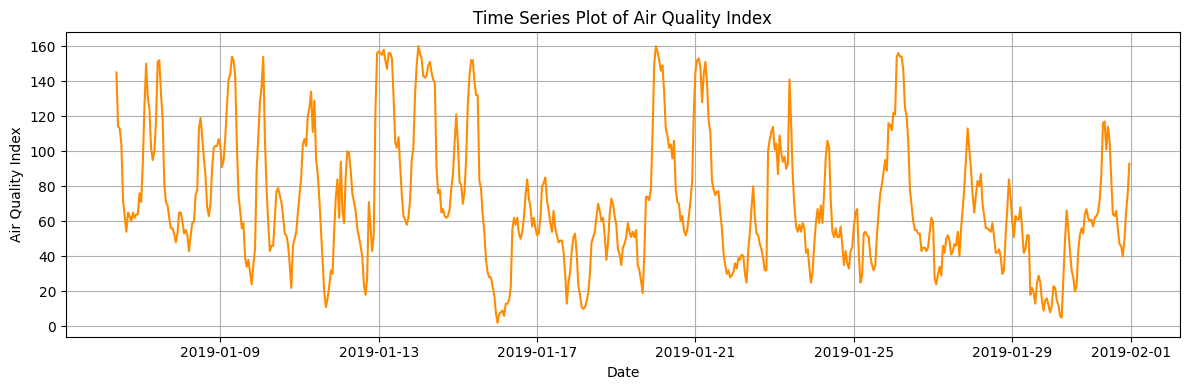

In [10]:
# Plot deret waktu Kualitas udara
plt.figure(figsize=(12, 4))
plt.plot(data_1['Kualitas_udara'], color='darkorange')
plt.title('Time Series Plot of Air Quality Index')
plt.xlabel('Date'),plt.ylabel('Air Quality Index')
plt.grid(True)
plt.tight_layout()
plt.show()

### Membuat Plot Time Series Data Kasus Covid dengan Input data Github

In [11]:
#untuk mengupdate isi github

# Masuk ke folder repo
%cd pelatihanTS

# Ambil update terbaru dari GitHub
!git pull

[Errno 2] No such file or directory: 'pelatihanTS'
/content/pelatihanTS
Already up to date.


In [12]:
#input data dari github
url_4 = '/content/pelatihanTS/data covid.xlsx'
data_4 = pd.read_excel(url_4)

In [13]:
data_4.head()

,date,positive_daily
0,2020-05-09,16
1,2020-05-10,11
2,2020-05-11,1
3,2020-05-12,6
4,2020-05-13,12


In [14]:
# Parsing tanggal
data_4['date'] = pd.to_datetime(data_4['date'])
data_4.set_index('date', inplace=True)
data_4.head()

,positive_daily
date,
2020-05-09,16
2020-05-10,11
2020-05-11,1
2020-05-12,6
2020-05-13,12


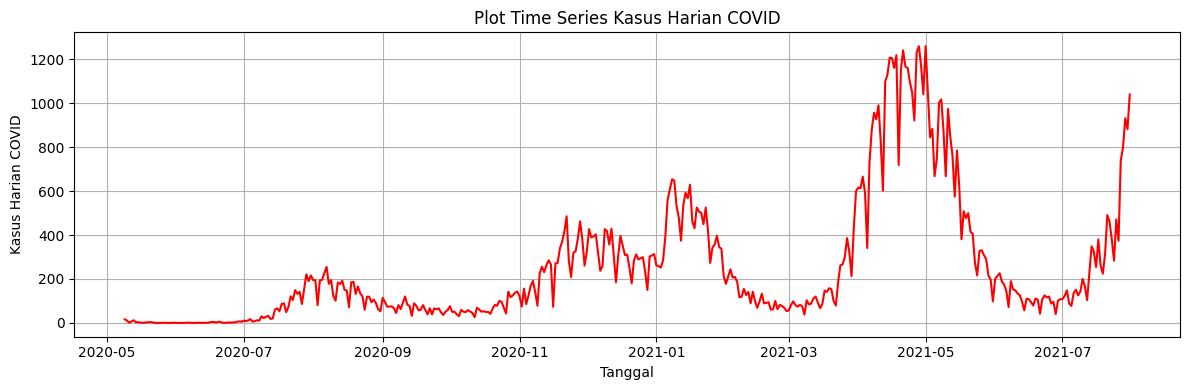

In [15]:
# Plot deret waktu Kasus Harian Covid
plt.figure(figsize=(12, 4))
plt.plot(data_4['positive_daily'], color='red')
plt.title('Plot Time Series Kasus Harian COVID')
plt.xlabel('Tanggal'),plt.ylabel('Kasus Harian COVID')
plt.grid(True)
plt.tight_layout()
plt.show()

### Membuat Plot Time Series Jumlah Penumpang Transjakarta dengan Input Google Drive

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
#input data dari drive
url_2 = '/content/drive/MyDrive/Pelatihan Time Series/data penumpang transjakarta.xlsx'
data_2 = pd.read_excel(url_2)

In [21]:
data_2.head()

,Date,penumpang_transjakarta
0,2024-04-01,714500
1,2024-04-02,1100220
2,2024-04-03,1148676
3,2024-04-04,1141872
4,2024-04-05,656466


In [22]:
# Parsing tanggal
data_2['Date'] = pd.to_datetime(data_2['Date'])
data_2.set_index('Date', inplace=True)
data_2.head()

,penumpang_transjakarta
Date,
2024-04-01,714500
2024-04-02,1100220
2024-04-03,1148676
2024-04-04,1141872
2024-04-05,656466


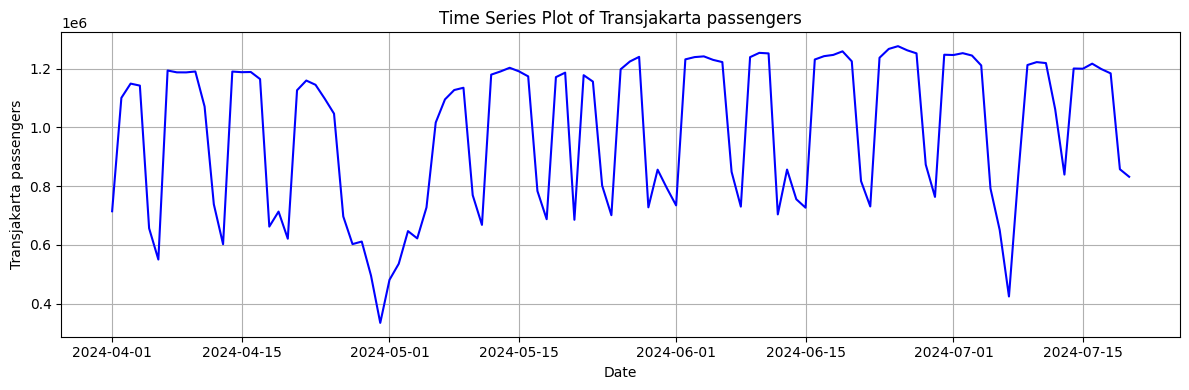

In [23]:
# Plot deret waktu Kualitas udara
plt.figure(figsize=(12, 4))
plt.plot(data_2['penumpang_transjakarta'], color='blue')
plt.title('Time Series Plot of Transjakarta passengers')
plt.xlabel('Date'),plt.ylabel('Transjakarta passengers')
plt.grid(True)
plt.tight_layout()
plt.show()

### Membuat Plot Time Series IHSG pada Data .csv dengan Input Github

In [24]:
url_ihsg = 'https://raw.githubusercontent.com/yenniangraini/pelatihanTS/refs/heads/main/data%20ihsg.csv'
data_ihsg = pd.read_csv(url_ihsg, header=0, parse_dates=[0], index_col=0, sep=';')

In [25]:
data_ihsg.head()

,IHSG
Date,
2018-01-01,6366.083008
2018-01-08,6354.361816
2018-01-15,6379.073242
2018-01-22,6495.383789
2018-01-29,6672.990234


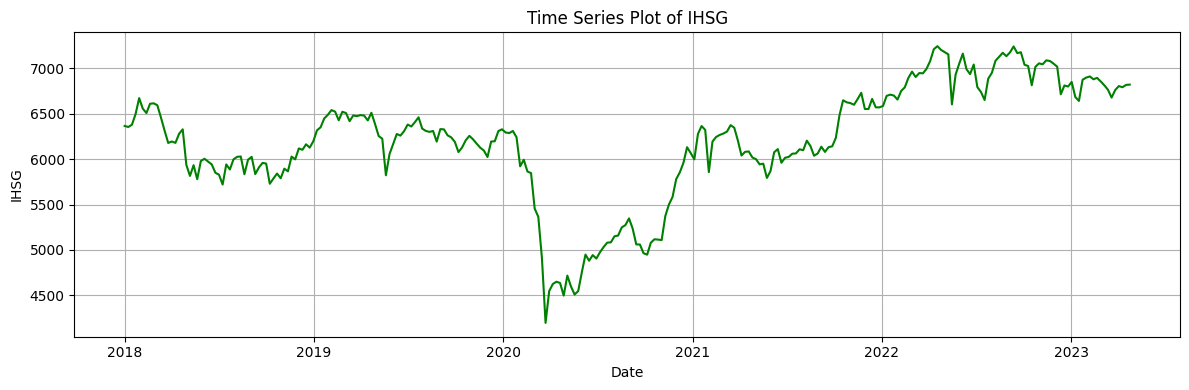

In [26]:
# Plot deret waktu Kualitas udara
plt.figure(figsize=(12, 4))
plt.plot(data_ihsg['IHSG'], color='green')
plt.title('Time Series Plot of IHSG')
plt.xlabel('Date'),plt.ylabel('IHSG')
plt.grid(True)
plt.tight_layout()
plt.show()

## Kestasioneran Data Deret Waktu

In [27]:
#input data dari github
url = '/content/pelatihanTS/data_modeling1.xlsx'
data = pd.read_excel(url)

In [28]:
data.head()

,date,total_deposit,inflation_rate,monthly_profit,interest_rate,unemployment_rate,gdp_growth,customer_count,digital_transactions
0,1982-01-01,120.897367,5.790427,136.624834,0.214433,3.600769,1.396615,10025.903205,33.819438
1,1982-02-01,121.998352,6.715061,131.112977,0.272499,3.925137,1.710247,10042.766637,39.490439
2,1982-03-01,119.250061,6.214949,122.930988,0.212709,3.398986,1.842500,10062.992751,41.237478
3,1982-04-01,123.014362,4.862313,122.897244,0.266155,3.378171,2.529928,10083.248740,44.994308
4,1982-05-01,122.297150,5.113265,121.195397,0.112590,3.255523,2.126460,10100.739819,37.254987


In [29]:
# Parsing tanggal
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

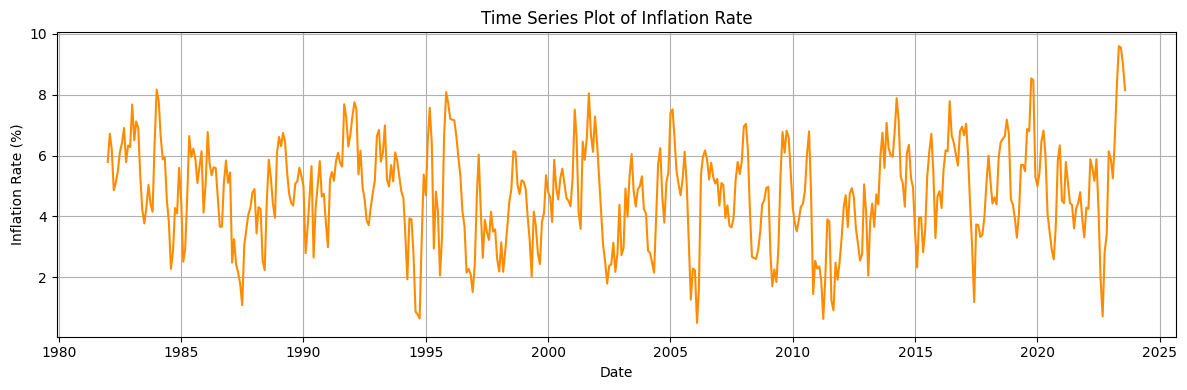

In [30]:
# Plot deret waktu inflation_rate
plt.figure(figsize=(12, 4))
plt.plot(data['inflation_rate'], color='darkorange')
plt.title('Time Series Plot of Inflation Rate')
plt.xlabel('Date'),plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

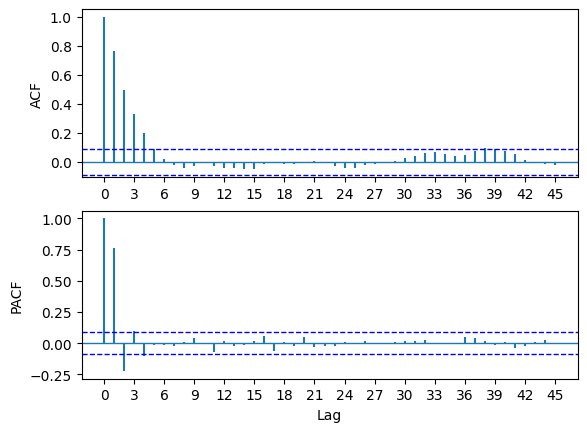

In [31]:
# membuat plot ACF dan PACF contoh dari data nao
acf_pacf_fig(data['inflation_rate'], both=True, lag=45)

In [32]:
# Uji ADF untuk stasioneritas dalam rataan
adf_result = adfuller(data['inflation_rate'])
print('p-value=', adf_result[1])

p-value= 4.62869786874281e-12


In [33]:
# Uji Box-Cox untuk stasioneritas dalam ragam
dt_bc,lambda_fit,ci=boxcox(data['inflation_rate'], alpha=0.05)

print(f'nilai lambda: ',lambda_fit)
print(f'interval kepercayaan lambda:', ci)

nilai lambda:  1.0463602154217342
interval kepercayaan lambda: (0.8627567092368486, 1.2371278483788402)


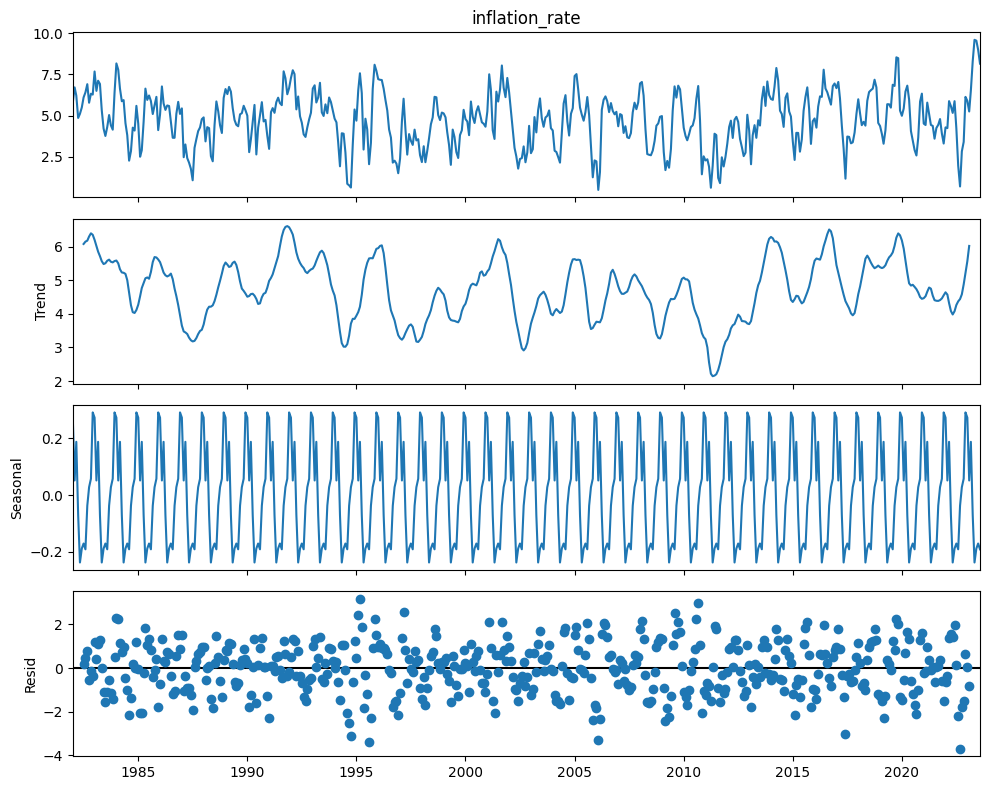

In [34]:
# Dekomposisi deret waktu
decomposition = seasonal_decompose(data['inflation_rate'], model='additive')

fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.tight_layout()
plt.show()

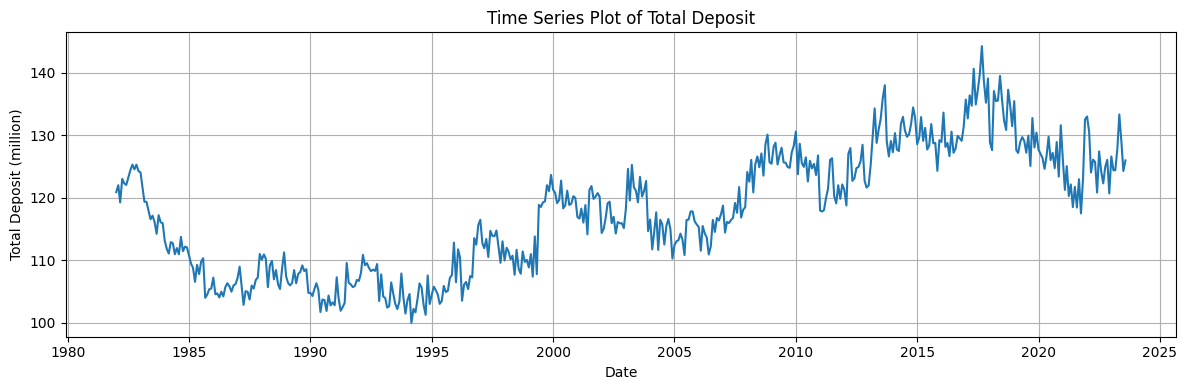

In [35]:
# Plot deret waktu inflation_rate
plt.figure(figsize=(12, 4))
plt.plot(data['total_deposit'])
plt.title('Time Series Plot of Total Deposit')
plt.xlabel('Date'),plt.ylabel('Total Deposit (million)')
plt.grid(True)
plt.tight_layout()
plt.show()

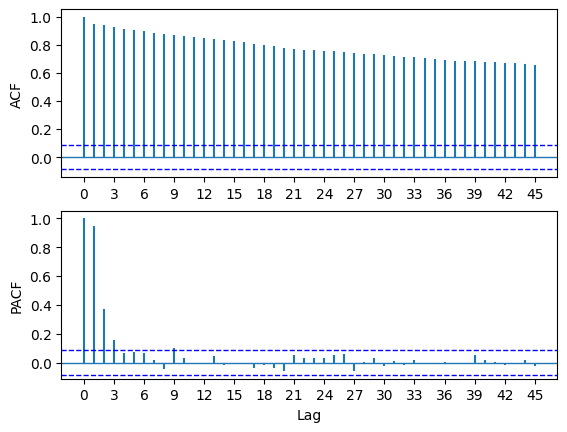

In [36]:
# membuat plot ACF dan PACF contoh dari data total deposit
acf_pacf_fig(data['total_deposit'], both=True, lag=45)

In [37]:
# Uji ADF untuk stasioneritas dalam rataan
adf_result = adfuller(data['total_deposit'])
print('p-value=',adf_result[1])

p-value= 0.5591014259209955


In [38]:
# Uji Box-Cox untuk stasioneritas dalam ragam
dt_bx,lambda_fit,ci=boxcox(data['total_deposit'], alpha=0.05)

print(f'nilai lambda: ',lambda_fit)
print(f'interval kepercayaan lambda:', ci)

nilai lambda:  -0.22439472799410923
interval kepercayaan lambda: (-1.3675811856987703, 0.9085395503672801)


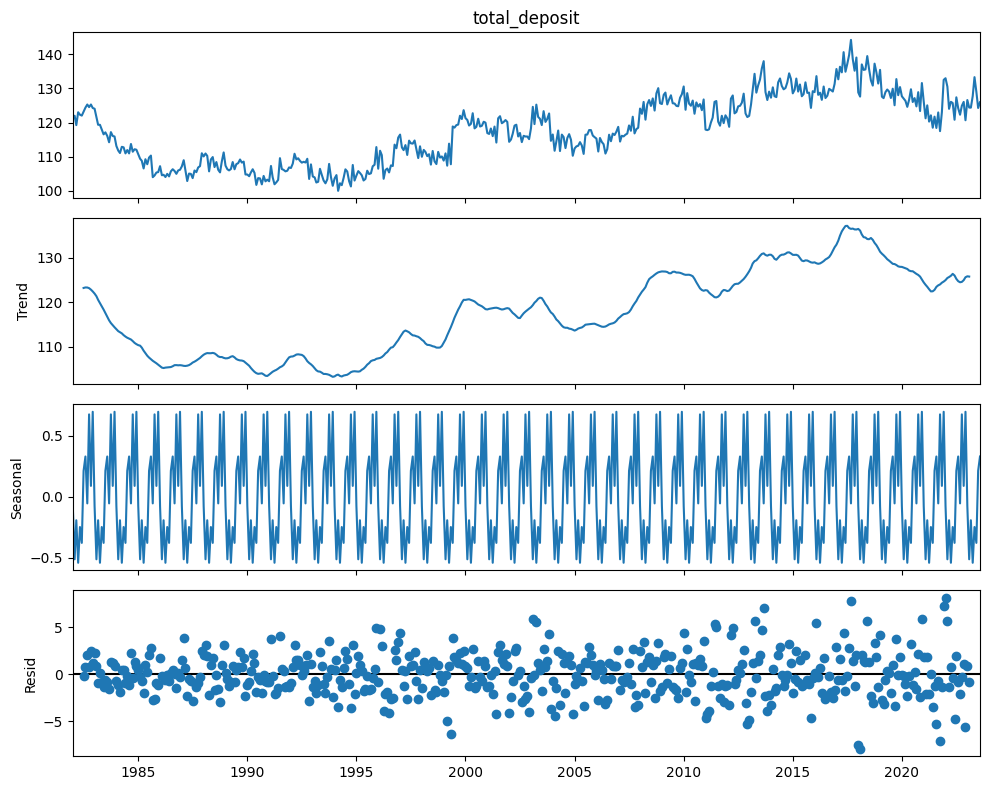

In [39]:
# Dekomposisi deret waktu
decomposition = seasonal_decompose(data['total_deposit'], model='additive')

fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.tight_layout()
plt.show()

## Pemodelan Data Deret Waktu: Pemulusan (Smoothing)

**Single Mooving Average**

Single Moving Average (SMA) adalah metode pemulusan yang menghitung rata-rata bergerak dari sejumlah periode tertentu.

$SMA_t=\frac{X_t+X_{t-1}+...+X_{t-n+1}}{n}$

dengan $n$ adalah periode yang digunakan untuk menghitung rata-rata.

In [40]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

data_dw=data.copy()
# Single Moving Average (SMA)
data_dw['total_deposit_3'] = data_dw['total_deposit'].rolling(window=3).mean()
data_dw['total_deposit_5'] = data_dw['total_deposit'].rolling(window=5).mean()


In [41]:
data_dw.head()

,total_deposit,inflation_rate,monthly_profit,interest_rate,unemployment_rate,gdp_growth,customer_count,digital_transactions,total_deposit_3,total_deposit_5
date,,,,,,,,,,
1982-01-01,120.897367,5.790427,136.624834,0.214433,3.600769,1.396615,10025.903205,33.819438,NaN,NaN
1982-02-01,121.998352,6.715061,131.112977,0.272499,3.925137,1.710247,10042.766637,39.490439,NaN,NaN
1982-03-01,119.250061,6.214949,122.930988,0.212709,3.398986,1.842500,10062.992751,41.237478,120.715260,NaN
1982-04-01,123.014362,4.862313,122.897244,0.266155,3.378171,2.529928,10083.248740,44.994308,121.420925,NaN
1982-05-01,122.297150,5.113265,121.195397,0.112590,3.255523,2.126460,10100.739819,37.254987,121.520524,121.491459


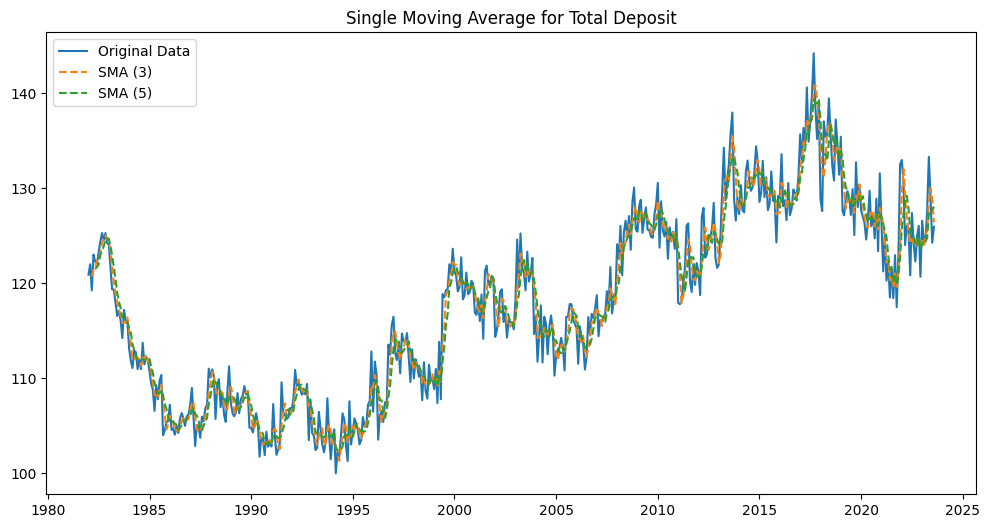

In [42]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data_dw['total_deposit'], label='Original Data')
plt.plot(data_dw['total_deposit_3'], label='SMA (3)', linestyle='--')
plt.plot(data_dw['total_deposit_5'], label='SMA (5)', linestyle='--')
plt.legend()
plt.title('Single Moving Average for Total Deposit')
plt.show()

In [43]:
mape_sma3 = mean_absolute_percentage_error(data_dw['total_deposit'][2:],data_dw['total_deposit_3'][2:])*100
mse_sma3 = mean_squared_error(data_dw['total_deposit'][2:],data_dw['total_deposit_3'][2:])
mae_sma3 = mean_absolute_error(data_dw['total_deposit'][2:],data_dw['total_deposit_3'][2:])

In [44]:
print('MAPE SMA(3): ',mape_sma3, '%')
print('MSE SMA(3): ',mse_sma3)
print('MAE SMA(3): ',mae_sma3)

MAPE SMA(3):  1.225980216086815 %
MSE SMA(3):  3.584858161235862
MAE SMA(3):  1.4595946033458527


In [45]:
mape_sma5 = mean_absolute_percentage_error(data_dw['total_deposit'][4:],data_dw['total_deposit_3'][4:])*100
mse_sma5 = mean_squared_error(data_dw['total_deposit'][4:],data_dw['total_deposit_3'][4:])
mae_sma5 = mean_absolute_error(data_dw['total_deposit'][4:],data_dw['total_deposit_3'][4:])

In [46]:
print('MAPE SMA(5): ',mape_sma5, '%')
print('MSE SMA(5): ',mse_sma5)
print('MAE SMA(5): ',mae_sma5)

MAPE SMA(5):  1.2258349660236083 %
MSE SMA(5):  3.5898659519794607
MAE SMA(5):  1.4593134589251446


**Double Mooving Average (DMA)**

Double Moving Average (DMA) adalah pengembangan dari SMA, di mana dua kali perhitungan SMA dilakukan:

- SMA pertama dihitung dari data asli.

- SMA kedua dihitung dari hasil SMA pertama.

In [47]:
# Double Moving Average (DMA)
data_dw['total_deposit_dma3'] = data_dw['total_deposit_3'].rolling(window=3).mean()
data_dw['total_deposit_dma5'] = data_dw['total_deposit_5'].rolling(window=5).mean()

In [48]:
data_dw.head(10)

,total_deposit,inflation_rate,monthly_profit,interest_rate,unemployment_rate,gdp_growth,customer_count,digital_transactions,total_deposit_3,total_deposit_5,total_deposit_dma3,total_deposit_dma5
date,,,,,,,,,,,,
1982-01-01,120.897367,5.790427,136.624834,0.214433,3.600769,1.396615,10025.903205,33.819438,NaN,NaN,NaN,NaN
1982-02-01,121.998352,6.715061,131.112977,0.272499,3.925137,1.710247,10042.766637,39.490439,NaN,NaN,NaN,NaN
1982-03-01,119.250061,6.214949,122.930988,0.212709,3.398986,1.842500,10062.992751,41.237478,120.715260,NaN,NaN,NaN
1982-04-01,123.014362,4.862313,122.897244,0.266155,3.378171,2.529928,10083.248740,44.994308,121.420925,NaN,NaN,NaN
1982-05-01,122.297150,5.113265,121.195397,0.112590,3.255523,2.126460,10100.739819,37.254987,121.520524,121.491459,121.218903,NaN
1982-06-01,122.037803,5.497162,116.663117,0.328281,3.491560,1.553571,10113.877492,48.476281,122.449772,121.719546,121.797074,NaN
1982-07-01,123.167097,6.107313,123.626991,0.312072,5.475657,2.093617,10135.492364,33.373568,122.500684,121.953295,122.156993,NaN
1982-08-01,124.378347,6.414066,133.180043,0.235242,4.709438,1.476101,10155.187344,45.078217,123.194416,122.978952,122.714957,NaN
1982-09-01,125.283840,6.908489,134.064112,0.387876,3.485331,2.256510,10177.688547,47.060817,124.276428,123.432848,123.323842,122.315220


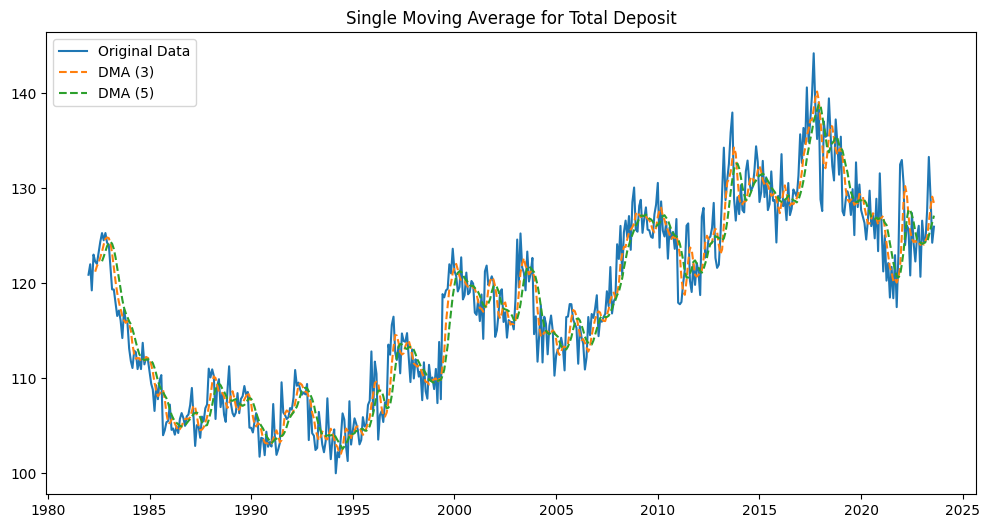

In [49]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data_dw['total_deposit'], label='Original Data')
plt.plot(data_dw['total_deposit_dma3'], label='DMA (3)', linestyle='--')
plt.plot(data_dw['total_deposit_dma5'], label='DMA (5)', linestyle='--')
plt.legend()
plt.title('Single Moving Average for Total Deposit')
plt.show()

In [50]:
mape_dma3 = mean_absolute_percentage_error(data_dw['total_deposit'][4:],data_dw['total_deposit_dma3'][4:])*100
mse_dma3 = mean_squared_error(data_dw['total_deposit'][4:],data_dw['total_deposit_dma3'][4:])
mae_dma3 = mean_absolute_error(data_dw['total_deposit'][4:],data_dw['total_deposit_dma3'][4:])

In [51]:
print('MAPE DMA(3): ',mape_dma3, '%')
print('MSE DMA(3): ',mse_dma3)
print('MAE DMA(3): ',mae_dma3)

MAPE DMA(3):  1.629618366397757 %
MSE DMA(3):  6.526440389179635
MAE DMA(3):  1.9387003003681869


In [52]:
mape_dma5 = mean_absolute_percentage_error(data_dw['total_deposit'][8:],data_dw['total_deposit_dma3'][8:])*100
mse_dma5 = mean_squared_error(data_dw['total_deposit'][8:],data_dw['total_deposit_dma3'][8:])
mae_dma5 = mean_absolute_error(data_dw['total_deposit'][8:],data_dw['total_deposit_dma3'][8:])

In [53]:
print('MAPE DMA(5): ',mape_dma5, '%')
print('MSE DMA(5): ',mse_dma5)
print('MAE DMA(5): ',mae_dma5)

MAPE DMA(5):  1.6362892653019026 %
MSE DMA(5):  6.569322540205952
MAE DMA(5):  1.9463473144048364


In [54]:
# Single Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(data_dw['total_deposit']).fit(smoothing_level=0.2, optimized=False)
data_dw['SES'] = ses_model.fittedvalues

In [55]:
# Double Exponential Smoothing (DES)
des_model = ExponentialSmoothing(data_dw['total_deposit'], trend='add').fit(smoothing_level=0.2, smoothing_trend=0.2, optimized=False)
data_dw['DES'] = des_model.fittedvalues

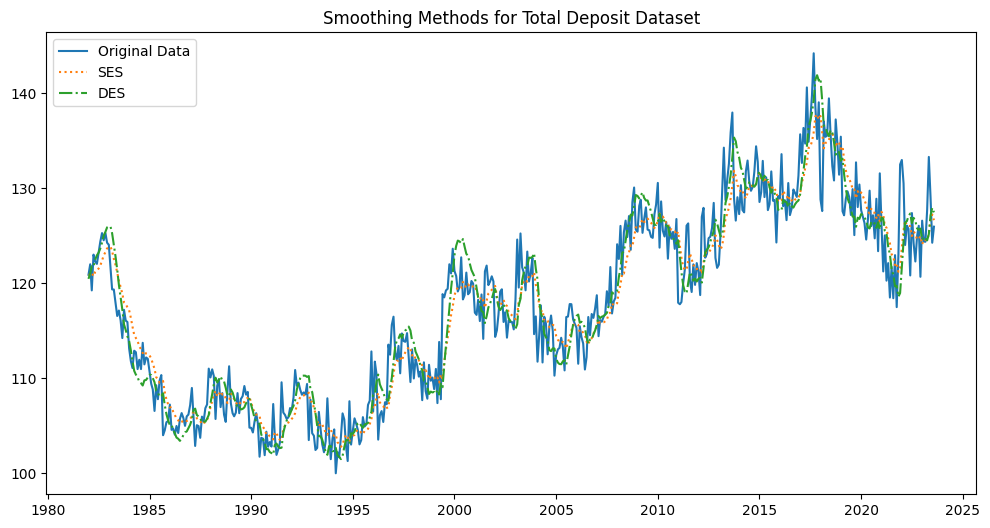

In [56]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data_dw['total_deposit'], label='Original Data')
plt.plot(data_dw['SES'], label='SES', linestyle=':')
plt.plot(data_dw['DES'], label='DES', linestyle='-.')
plt.legend()
plt.title('Smoothing Methods for Total Deposit Dataset')
plt.show()

In [57]:
mape_ses = mean_absolute_percentage_error(data_dw['total_deposit'],data_dw['SES'])*100
mse_ses = mean_squared_error(data_dw['total_deposit'],data_dw['SES'])
mae_ses = mean_absolute_error(data_dw['total_deposit'],data_dw['SES'])

In [58]:
print('MAPE SES: ',mape_ses, '%')
print('MSE SES: ',mse_ses)
print('MAE SES: ',mae_ses)

MAPE SES:  1.936040173053849 %
MSE SES:  8.976458245899916
MAE SES:  2.2997919292246394


In [59]:
mape_des = mean_absolute_percentage_error(data_dw['total_deposit'],data_dw['DES'])*100
mse_des = mean_squared_error(data_dw['total_deposit'],data_dw['DES'])
mae_des = mean_absolute_error(data_dw['total_deposit'],data_dw['DES'])

In [60]:
print('MAPE DES: ',mape_des, '%')
print('MSE DES: ',mse_des)
print('MAE DES: ',mae_des)

MAPE DES:  1.9935680482811575 %
MSE DES:  9.849949709636915
MAE DES:  2.3669135318814316


In [61]:
pd.DataFrame({'Ukuran Akurasi':['MAPE','MSE','MAE'],
            'SMA(3)':[mape_sma3,mse_sma3,mae_sma3],
            'SMA(5)':[mape_sma5,mse_sma5,mae_sma5],
            'DMA(3)':[mape_dma3,mse_dma3,mae_dma3],
            'DMA(5)':[mape_dma5,mse_dma5,mae_dma5],
            'SES':[mape_ses,mse_ses,mae_ses],
            'DES':[mape_ses,mse_ses,mae_ses]})

,Ukuran Akurasi,SMA(3),SMA(5),DMA(3),DMA(5),SES,DES
0,MAPE,1.225980,1.225835,1.629618,1.636289,1.936040,1.936040
1,MSE,3.584858,3.589866,6.526440,6.569323,8.976458,8.976458
2,MAE,1.459595,1.459313,1.938700,1.946347,2.299792,2.299792


## Pemodelan Box-Jenkins: ARIMA

Pada tahap eksplorasi sebelumnya, variabel total deposit tidak stasioner dalam ragam maupun nilaitengah.

In [62]:
# penanganan ketidakstasioneran dalam nilai ragam.
tot_deposit=data_dw['total_deposit']**(-0.5)

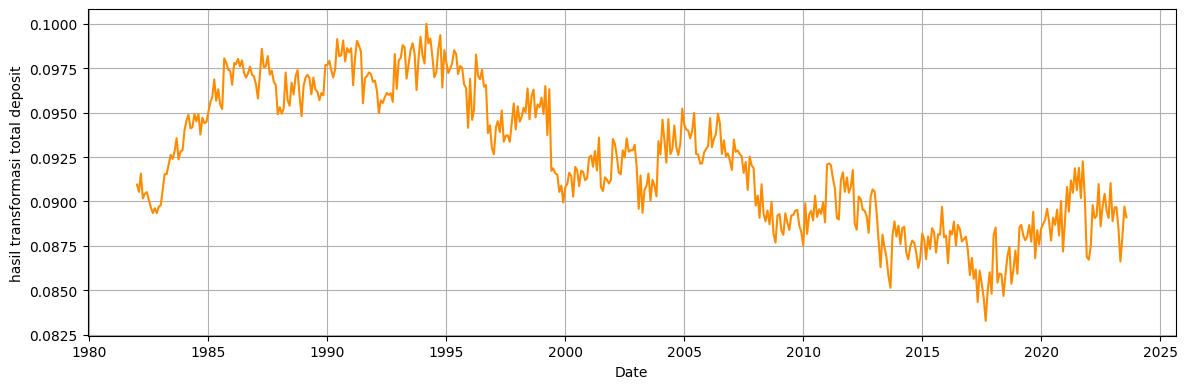

In [63]:
# Plot deret waktu inflation_rate
plt.figure(figsize=(12, 4))
plt.plot(tot_deposit, color='darkorange')
plt.xlabel('Date'),plt.ylabel('hasil transformasi total deposit')
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
# pembagian data latih dan data uji
train, test = tot_deposit[:-15], tot_deposit[-15:]

Panjang data training: 485
Panjang data testing: 15


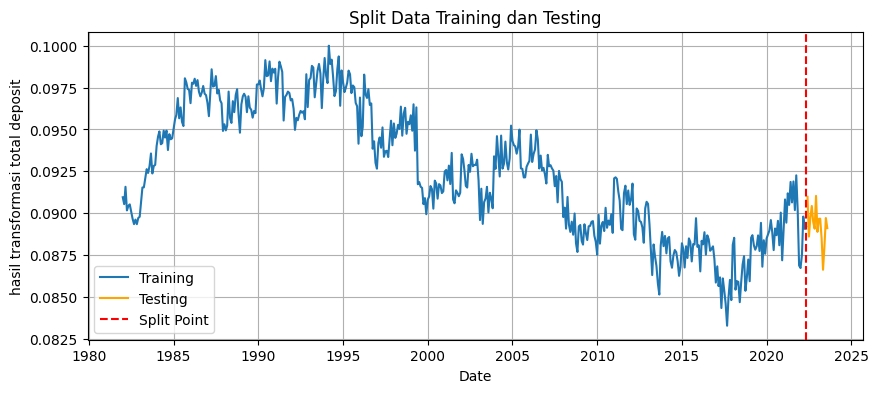

In [65]:
print(f"Panjang data training: {len(train)}")
print(f"Panjang data testing: {len(test)}")

# Visualisasi split
plt.figure(figsize=(10, 4))
plt.plot(train, label="Training")
plt.plot(test, label="Testing", color='orange')
plt.xlabel('Date'),plt.ylabel('hasil transformasi total deposit')
plt.axvline(x=train.index[-1], color='red', linestyle='--', label='Split Point')
plt.title("Split Data Training dan Testing")
plt.legend()
plt.grid(True)
plt.show()

In [66]:
# Uji Box-Cox untuk stasioneritas dalam ragam
dt,lambda_fit,ci=boxcox(train, alpha=0.05)

print(f'nilai lambda: ',lambda_fit)
print(f'interval kepercayaan lambda:', ci)

nilai lambda:  1.166504391327305
interval kepercayaan lambda: (-1.1316607216917909, 3.4869700908984744)


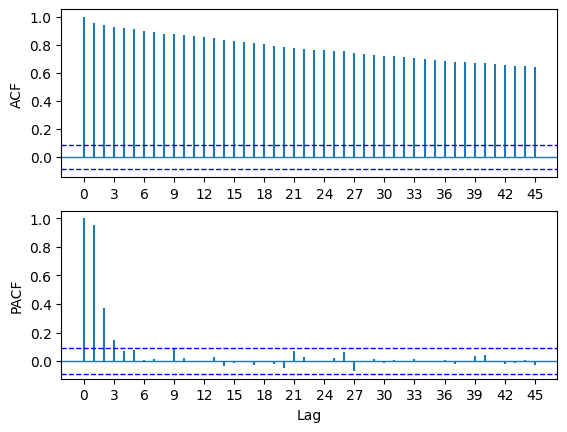

In [67]:
# membuat plot ACF dan PACF contoh
acf_pacf_fig(train, both=True, lag=45)

In [68]:
tot_dep_diff=train.diff().dropna()

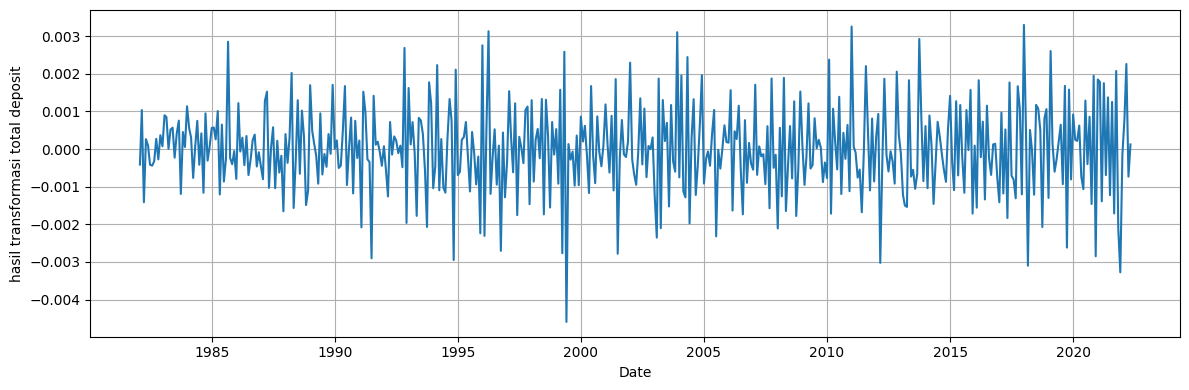

In [69]:
# Plot deret waktu
plt.figure(figsize=(12, 4))
plt.plot(tot_dep_diff)
plt.xlabel('Date'),plt.ylabel('hasil transformasi total deposit')
plt.grid(True)
plt.tight_layout()
plt.show()

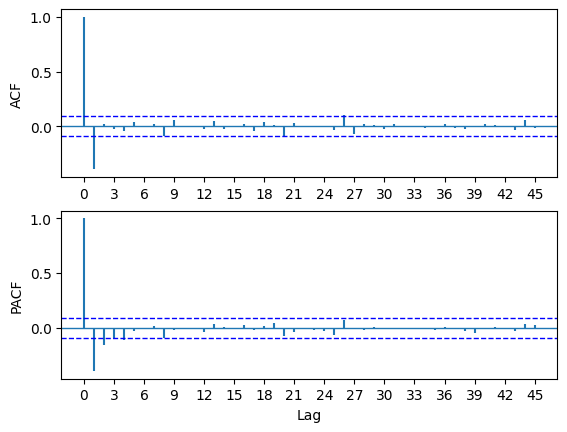

In [70]:
# membuat plot ACF dan PACF contoh
acf_pacf_fig(tot_dep_diff, both=True, lag=45)

In [71]:
# Uji ADF untuk stasioneritas dalam rataan
adf_result = adfuller(tot_dep_diff)
print('p-value=',adf_result[1])

p-value= 2.257261178351401e-27


In [72]:
#model ARIMA (0,1,1)
model_ima=ARIMA(train,order=(0,1,1)).fit()

#model ARIMA (2,1,0)
model_ari=ARIMA(train,order=(2,1,0)).fit()

#model ARIMA (2,1,1)
model_arima=ARIMA(train,order=(2,1,1)).fit()

In [73]:
pd.DataFrame({'Model':['ARIMA(0,1,1)','ARIMA(2,1,0)','ARIMA(2,1,1)'],
            'AIC':[model_ima.aic,model_ari.aic,model_arima.aic],
            'BIC':[model_ima.bic,model_ari.bic,model_arima.bic]})

,Model,AIC,BIC
0,"ARIMA(0,1,1)",-5266.669968,-5258.305799
1,"ARIMA(2,1,0)",-5256.889856,-5244.343601
2,"ARIMA(2,1,1)",-5264.219966,-5247.491627


In [74]:
print(model_ima.summary())

                               SARIMAX Results                                
Dep. Variable:          total_deposit   No. Observations:                  485
Model:                 ARIMA(0, 1, 1)   Log Likelihood                2635.335
Date:                Wed, 28 May 2025   AIC                          -5266.670
Time:                        05:10:12   BIC                          -5258.306
Sample:                    01-01-1982   HQIC                         -5263.383
                         - 05-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4695      0.038    -12.251      0.000      -0.545      -0.394
sigma2      1.086e-06   5.95e-08     18.245      0.000    9.69e-07     1.2e-06
Ljung-Box (L1) (Q):                   0.11   Jarque-

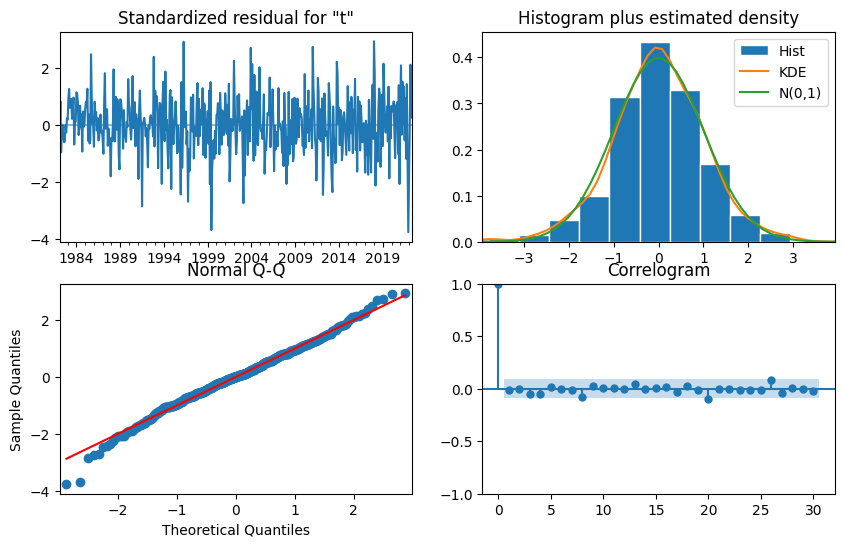

In [75]:
#Analisis Sisaan Model
model_ima.plot_diagnostics(figsize=(10,6), lags=30)
plt.show()

In [76]:
from statsmodels.stats.diagnostic import het_arch
print(f'Uji heteroskedastisitas: ',het_arch(model_ima.resid, nlags=30)[1])
print(f'Uji Autokorelasi: ',runstest_1samp(model_ima.resid, correction=False)[1])
print(f'Uji Normalitas: ',jarque_bera(model_ima.resid)[1])

Uji heteroskedastisitas:  0.2792270481267412
Uji Autokorelasi:  0.8470008091664271
Uji Normalitas:  0.0


In [77]:
#overfitting model ARIMA (1,1,1) dan (0,1,2)
model_arima111=ARIMA(tot_deposit,order=(1,1,1)).fit()
model_arima012=ARIMA(tot_deposit,order=(0,1,2)).fit()

In [78]:
pd.DataFrame({'Model':['ARIMA(0,1,1)','ARIMA(1,1,1)','ARIMA(0,1,2)'],
            'AIC':[model_ima.aic,model_arima111.aic,model_arima012.aic],
            'BIC':[model_ima.bic,model_arima111.bic,model_arima012.bic]})

,Model,AIC,BIC
0,"ARIMA(0,1,1)",-5266.669968,-5258.305799
1,"ARIMA(1,1,1)",-5422.161188,-5409.523369
2,"ARIMA(0,1,2)",-5422.913050,-5410.275232


In [79]:
print(model_arima012.summary())

                               SARIMAX Results                                
Dep. Variable:          total_deposit   No. Observations:                  500
Model:                 ARIMA(0, 1, 2)   Log Likelihood                2714.457
Date:                Wed, 28 May 2025   AIC                          -5422.913
Time:                        05:10:13   BIC                          -5410.275
Sample:                    01-01-1982   HQIC                         -5417.954
                         - 08-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4896      0.041    -11.950      0.000      -0.570      -0.409
ma.L2         -0.0049      0.040     -0.122      0.903      -0.083       0.074
sigma2      1.097e-06      6e-08     18.294      0.0

In [80]:
#menggunakan model untuk prediksi
prediksi=model_ima.get_forecast(15).summary_frame(alpha=0.05)

In [81]:
# mentransformasi balik hasil prediksi ke skala data asli
pred_tr=prediksi['mean']**(-2)

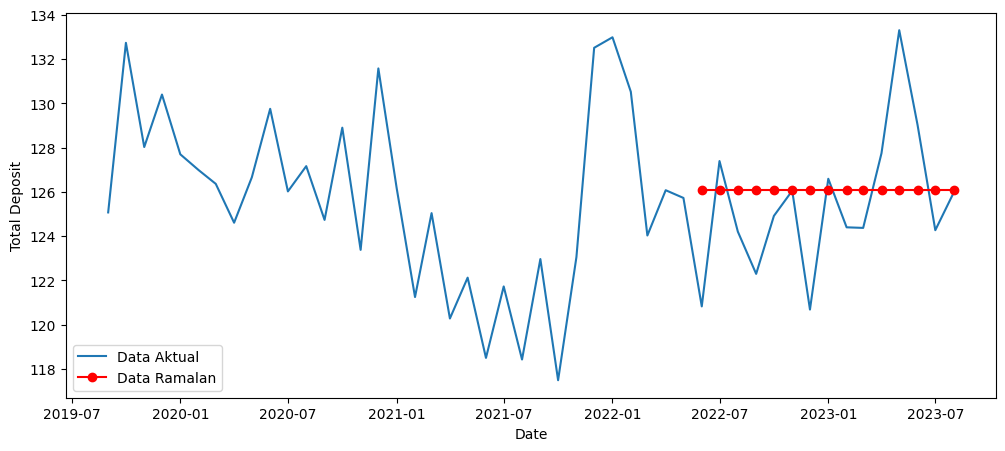

In [82]:
plt.figure(figsize=(12,5))
plt.plot(data_dw['total_deposit'][-48:],label='Data Aktual')
plt.plot(pred_tr,'-or',label='Data Ramalan')
plt.xlabel('Date'), plt.ylabel('Total Deposit')
plt.legend()
plt.show()

In [83]:
print('MAPE: ',mean_absolute_percentage_error(data_dw['total_deposit'][-15:],pred_tr)*100, '%')
print('MSE: ',mean_squared_error(data_dw['total_deposit'][-15:],pred_tr))
print('MAE: ',mean_absolute_error(data_dw['total_deposit'][-15:],pred_tr))

MAPE:  1.9387533856800092 %
MSE:  10.029704046347893
MAE:  2.4308251199571487


## Pemodelan Box-Jenkins: SARIMA

In [84]:
url_season = '/content/pelatihanTS/data_musiman.xlsx'
dt_season=pd.read_excel(url_season)

In [85]:
dt_season.head()

,date,balance
0,2013-01-31,634.569214
1,2013-02-28,731.662116
2,2013-03-31,789.700652
3,2013-04-30,1017.105900
4,2013-05-31,1132.899842


In [86]:
dt_season['date'] = pd.to_datetime(dt_season['date'])
dt_season.set_index('date', inplace=True)

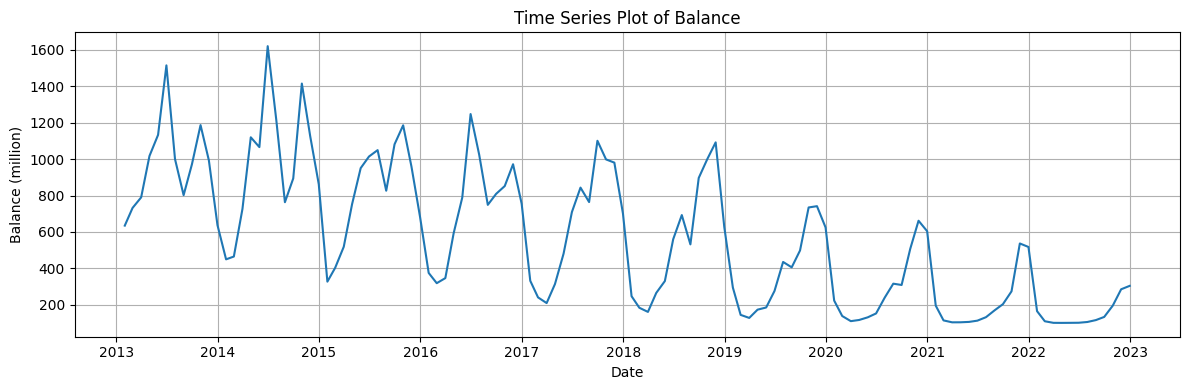

In [87]:
plt.figure(figsize=(12, 4))
plt.plot(dt_season['balance'])
plt.title('Time Series Plot of Balance')
plt.xlabel('Date'),plt.ylabel('Balance (million)')
plt.grid(True)
plt.tight_layout()
plt.show()

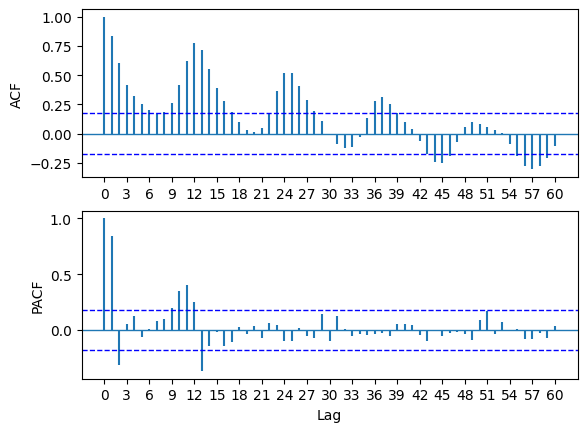

In [88]:
acf_pacf_fig(dt_season['balance'], both=True, lag=60)

In [89]:
dt_bc,lambda_fit,ci=boxcox(dt_season['balance'], alpha=0.05)

print(f'nilai lambda: ',lambda_fit)
print(f'interval kepercayaan lambda:', ci)

nilai lambda:  0.3364001998468622
interval kepercayaan lambda: (0.0791415351604466, 0.5971699565250044)


In [90]:
trans=(dt_season['balance'])**(0.5)

In [91]:
dt_bc,lambda_fit,ci=boxcox(trans, alpha=0.05)

print(f'nilai lambda: ',lambda_fit)
print(f'interval kepercayaan lambda:', ci)

nilai lambda:  0.6728004096313122
interval kepercayaan lambda: (0.1582830703209811, 1.1943399130507921)


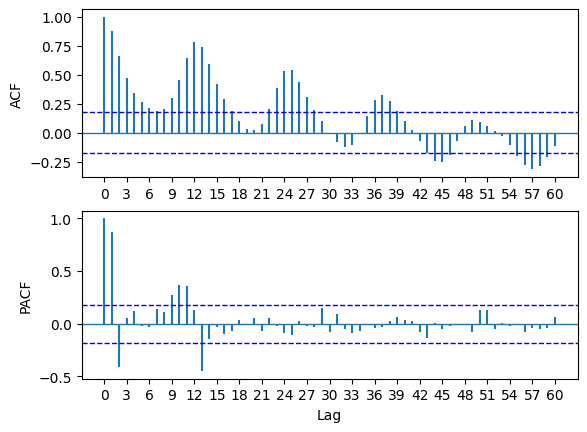

In [92]:
acf_pacf_fig(trans, both=True, lag=60)

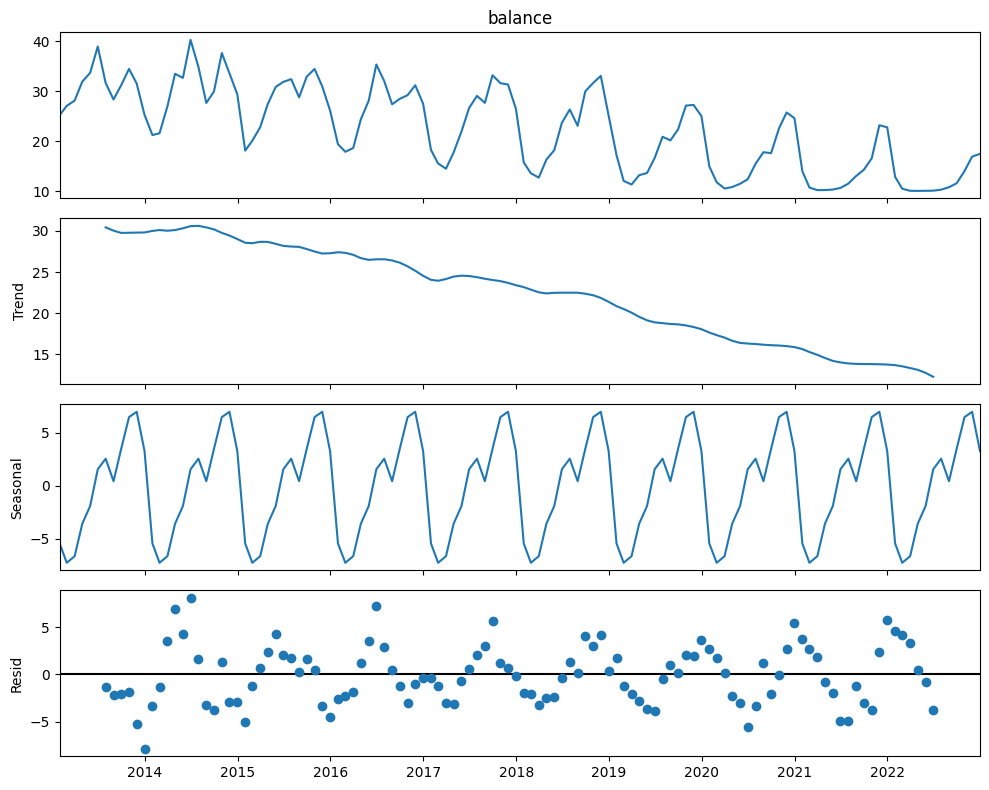

In [93]:
decomposition = seasonal_decompose(trans, model='additive')

fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.tight_layout()
plt.show()

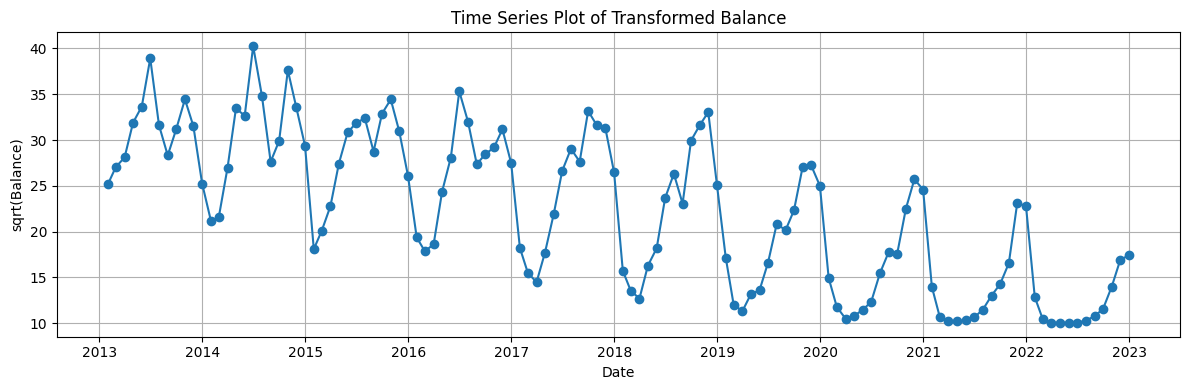

In [94]:
plt.figure(figsize=(12, 4))
plt.plot(trans,'-o')
plt.title('Time Series Plot of Transformed Balance')
plt.xlabel('Date'),plt.ylabel('sqrt(Balance)')
plt.grid(True)
plt.tight_layout()
plt.show()

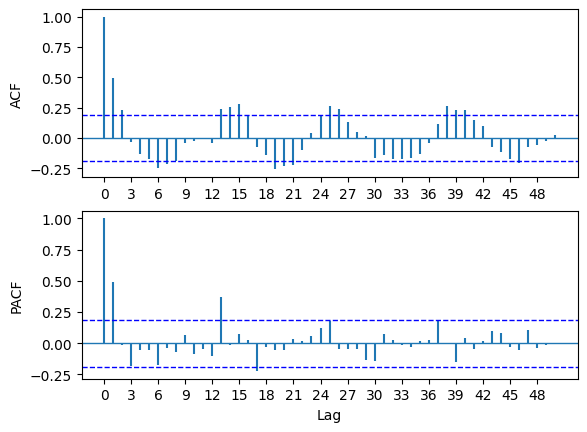

In [95]:
acf_pacf_fig(trans.diff(12).dropna(), both=True, lag=50)

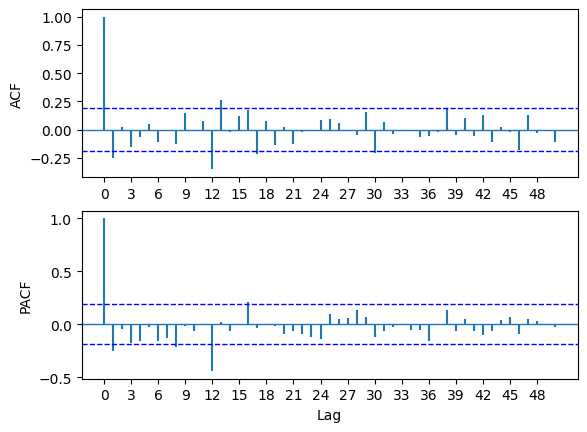

In [96]:
acf_pacf_fig(trans.diff(12).diff().dropna(), both=True, lag=50)

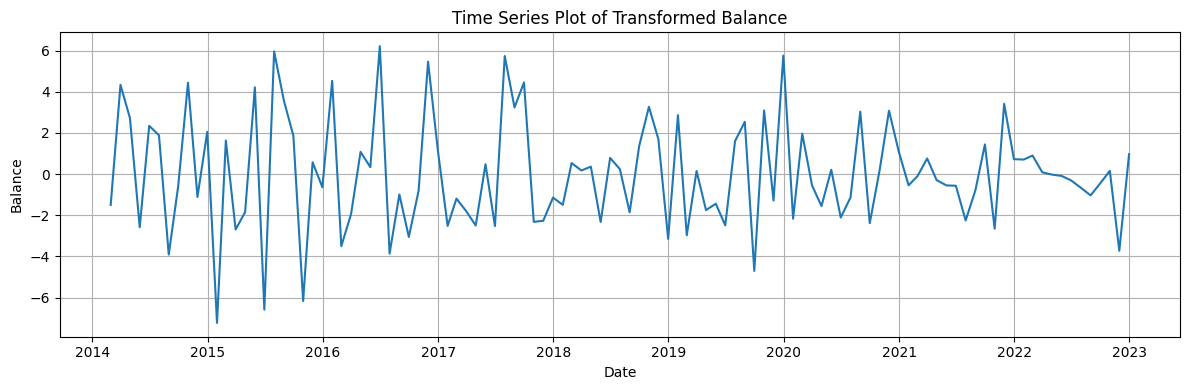

In [97]:
plt.figure(figsize=(12, 4))
plt.plot(trans.diff(12).diff().dropna())
plt.title('Time Series Plot of Transformed Balance')
plt.xlabel('Date'),plt.ylabel('Balance')
plt.grid(True)
plt.tight_layout()
plt.show()

In [98]:
#model SARIMA (0,1,1)x(0,1,1)12
model1 = sm.tsa.statespace.SARIMAX(
    trans,
    order=(0, 1, 1),              # (p,d,q) non-seasonal
    seasonal_order=(0, 1, 1, 12), # (P,D,Q,m) seasonal
    enforce_stationarity=True,
    enforce_invertibility=True
)
model_seasonal1 = model1.fit()

#model SARIMA (1,1,0)x(1,1,0)12
model2 = sm.tsa.statespace.SARIMAX(
    trans,
    order=(1, 1, 0),
    seasonal_order=(1, 1, 0, 12),
    enforce_stationarity=True,
    enforce_invertibility=True
)
model_seasonal2 = model2.fit()

#model SARIMA (1,1,1)x(1,1,1)12
model3 = sm.tsa.statespace.SARIMAX(
    trans,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=True,
    enforce_invertibility=True
)
model_seasonal3 = model3.fit()

#model SARIMA (1,1,0)x(1,1,1)12
model4 = sm.tsa.statespace.SARIMAX(
    trans,
    order=(1, 1, 0),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=True,
    enforce_invertibility=True
)
model_seasonal4 = model4.fit()

#model SARIMA (0,1,1)x(1,1,1)12
model5 = sm.tsa.statespace.SARIMAX(
    trans,
    order=(0, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=True,
    enforce_invertibility=True
)
model_seasonal5 = model5.fit()

In [99]:
pd.DataFrame({'Model':['SARIMA (0,1,1)x(0,1,1)',
                       'SARIMA (1,1,0)x(1,1,0)',
                       'SARIMA (1,1,1)x(1,1,1)',
                       'SARIMA (1,1,0)x(1,1,1)',
                       'SARIMA (0,1,1)x(1,1,1)'],
            'AIC':[model_seasonal1.aic,model_seasonal2.aic,model_seasonal3.aic,model_seasonal4.aic,model_seasonal5.aic],
            'BIC':[model_seasonal1.bic,model_seasonal2.bic,model_seasonal3.bic,model_seasonal4.bic,model_seasonal5.bic]})

,Model,AIC,BIC
0,"SARIMA (0,1,1)x(0,1,1)",502.205374,510.223861
1,"SARIMA (1,1,0)x(1,1,0)",500.328497,508.346984
2,"SARIMA (1,1,1)x(1,1,1)",488.429820,501.793964
3,"SARIMA (1,1,0)x(1,1,1)",501.941037,512.632353
4,"SARIMA (0,1,1)x(1,1,1)",501.913489,512.604805


In [100]:
print(model_seasonal3.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            balance   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -239.215
Date:                            Wed, 28 May 2025   AIC                            488.430
Time:                                    05:10:26   BIC                            501.794
Sample:                                01-31-2013   HQIC                           493.847
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5920      0.100      5.929      0.000       0.396       0.788
ma.L1         -0.9997      3.102   

In [101]:
print(model_seasonal2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            balance   No. Observations:                  120
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -247.164
Date:                            Wed, 28 May 2025   AIC                            500.328
Time:                                    05:10:26   BIC                            508.347
Sample:                                01-31-2013   HQIC                           503.579
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1887      0.093     -2.029      0.042      -0.371      -0.006
ar.S.L12      -0.3548      0.086   

In [102]:
from statsmodels.stats.diagnostic import het_arch
print(f'Uji heteroskedastisitas: ',het_arch(model_seasonal2.resid, nlags=30)[1])
print(f'Uji Autokorelasi: ',runstest_1samp(model_seasonal2.resid, correction=False)[1])
print(f'Uji Normalitas: ',jarque_bera(model_seasonal2.resid)[1])

Uji heteroskedastisitas:  0.10357360704701807
Uji Autokorelasi:  0.041232937186777015
Uji Normalitas:  0.0


In [103]:
print(model_seasonal1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            balance   No. Observations:                  120
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -248.103
Date:                            Wed, 28 May 2025   AIC                            502.205
Time:                                    05:10:26   BIC                            510.224
Sample:                                01-31-2013   HQIC                           505.456
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1853      0.091     -2.028      0.043      -0.364      -0.006
ma.S.L12      -0.3088      0.106   

In [104]:
print(f'Uji heteroskedastisitas: ',het_arch(model_seasonal1.resid, nlags=30)[1])
print(f'Uji Autokorelasi: ',runstest_1samp(model_seasonal1.resid, correction=False)[1])
print(f'Uji Normalitas: ',jarque_bera(model_seasonal1.resid)[1])

Uji heteroskedastisitas:  0.13660528184429915
Uji Autokorelasi:  0.10463941708476478
Uji Normalitas:  2.3148465455765135e-306


In [105]:
n_forecast = 36
forecast = model_seasonal1.get_forecast(steps=n_forecast)

predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

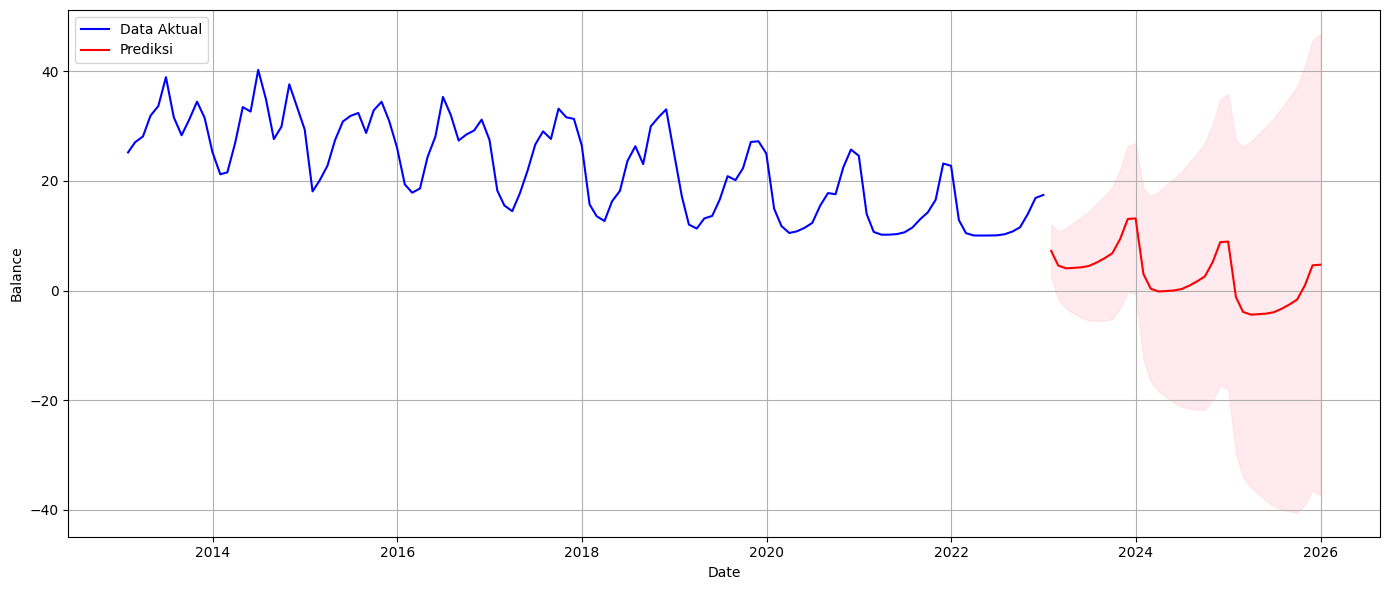

In [106]:
plt.figure(figsize=(14,6))
plt.plot(trans.index, trans, label='Data Aktual', color='blue')
plt.plot(predicted_mean.index, predicted_mean, label='Prediksi', color='red')
plt.fill_between(predicted_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Balance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

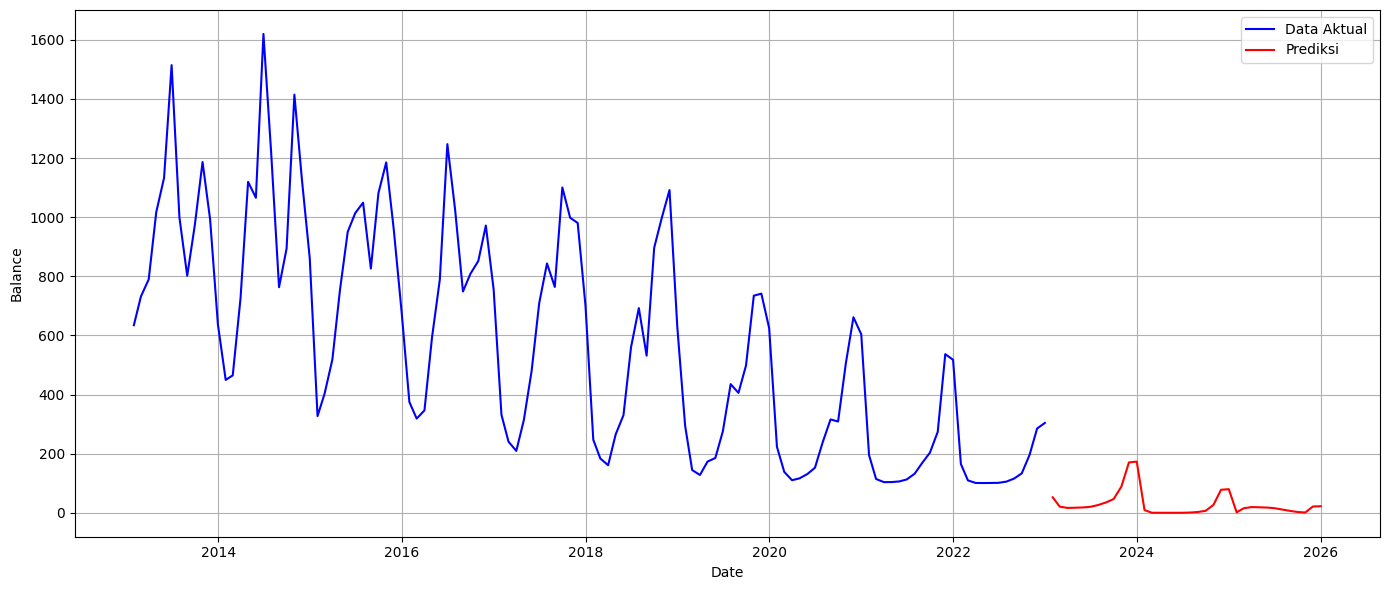

In [107]:
plt.figure(figsize=(14,6))
plt.plot(dt_season.index, dt_season['balance'], label='Data Aktual', color='blue')
plt.plot(predicted_mean.index, predicted_mean**2, label='Prediksi', color='red')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Pemodelan dengan Kovariat: ARDL

Metode ARDL bisa digunakan hanya jika diantara variabel-variabel yang digunakan tidak ada yang non-stasioner I(2). Maksudnya adalah data tidak stasioner tapi akan stasioner setelah dilakukan pembedaan ordo dua.

In [108]:
from statsmodels.tsa.ardl import ARDL, ardl_select_order

In [109]:
#input data dari github
url_ardl = '/content/pelatihanTS/data_kovariat_ardl.xlsx'
data_ardl=pd.read_excel(url_ardl)

In [110]:
data_ardl.head()

,date,total_deposit,inflation_rate,monthly_profit,total_loan,exchange_rate
0,1982-01-01,74.755570,2.649014,23.891805,44.981104,1.127184
1,1982-02-01,78.906068,2.458521,17.244071,44.992066,1.370821
2,1982-03-01,84.774546,2.694307,15.909006,43.707226,1.354560
3,1982-04-01,79.402789,2.956909,19.983128,43.391303,1.282112
4,1982-05-01,63.571381,2.429754,19.149077,39.904074,1.115082


In [111]:
# Parsing tanggal
data_ardl['date'] = pd.to_datetime(data_ardl['date'])
data_ardl.set_index('date', inplace=True)

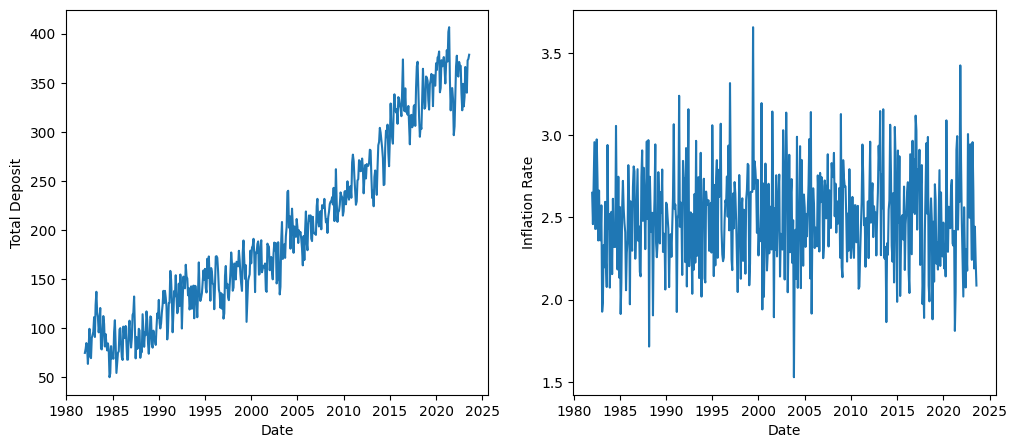

In [112]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(data_ardl['total_deposit'])
plt.xlabel('Date'), plt.ylabel('Total Deposit')
plt.subplot(1,2,2)
plt.plot(data_ardl['inflation_rate'])
plt.xlabel('Date'), plt.ylabel('Inflation Rate')
plt.show()

In [113]:
train, test = data_ardl[:-12], data_ardl[-12:]

In [114]:
print('p-value uji ADF inflation rate= ', adfuller(train['inflation_rate'])[1])
print('p-value uji ADF Total Deposit= ',adfuller(train['total_deposit'])[1])

p-value uji ADF inflation rate=  0.0
p-value uji ADF Total Deposit=  0.9638640465204775


In [115]:
adfuller(train['total_deposit'].diff().dropna())[1]

np.float64(7.193819998377261e-21)

In [116]:
from statsmodels.tsa.stattools import grangercausalitytests

# Cek apakah inflation_rate menyebabkan (secara Granger) total_deposit
grangercausalitytests(train[['total_deposit', 'inflation_rate']], maxlag=3)[1]


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=748.7957, p=0.0000  , df_denom=484, df_num=1
ssr based chi2 test:   chi2=753.4370, p=0.0000  , df=1
likelihood ratio test: chi2=455.3230, p=0.0000  , df=1
parameter F test:         F=748.7957, p=0.0000  , df_denom=484, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=622.0846, p=0.0000  , df_denom=481, df_num=2
ssr based chi2 test:   chi2=1257.1024, p=0.0000  , df=2
likelihood ratio test: chi2=620.7256, p=0.0000  , df=2
parameter F test:         F=622.0846, p=0.0000  , df_denom=481, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1893.5785, p=0.0000  , df_denom=478, df_num=3
ssr based chi2 test:   chi2=5763.9263, p=0.0000  , df=3
likelihood ratio test: chi2=1239.6678, p=0.0000  , df=3
parameter F test:         F=1893.5785, p=0.0000  , df_denom=478, df_num=3


({'ssr_ftest': (np.float64(748.7956651376063),
   np.float64(2.5346202078919856e-100),
   np.float64(484.0),
   np.int64(1)),
  'ssr_chi2test': (np.float64(753.4369605826741),
   np.float64(7.17934563113374e-166),
   np.int64(1)),
  'lrtest': (np.float64(455.3230173115044),
   np.float64(5.00835001951871e-101),
   np.int64(1)),
  'params_ftest': (np.float64(748.7956651376053),
   np.float64(2.534620207892346e-100),
   np.float64(484.0),
   1.0)},
  array([[0., 1., 0.]])])

In [117]:
# Menentukan lag optimal untuk ARDL dengan pemilihan otomatis
selected_model = ardl_select_order(
    endog=train['total_deposit'],
    exog=train[['inflation_rate']],
    maxlag=7,  # maksimal lag untuk dicoba
    ic='bic',  # bisa 'bic', 'aic', atau 'hqic'
    maxorder=7
)

In [118]:
print('Lag komponen autoregressive: ',selected_model.ar_lags)
print('Lag variabel exogen (X): ',selected_model.dl_lags)

Lag komponen autoregressive:  [1, 2]
Lag variabel exogen (X):  {'inflation_rate': [0, 1, 2, 3, 4]}


In [119]:
model = ARDL(
    endog=train['total_deposit'],
    lags=2,  # lag Y
    exog=train[['inflation_rate']],
    order=4  # lag X
)
result = model.fit()
print(result.summary())

                              ARDL Model Results                              
Dep. Variable:          total_deposit   No. Observations:                  488
Model:                     ARDL(2, 4)   Log Likelihood               -1417.496
Method:               Conditional MLE   S.D. of innovations              4.471
Date:                Wed, 28 May 2025   AIC                           2852.993
Time:                        05:10:27   BIC                           2890.668
Sample:                    05-01-1982   HQIC                          2867.794
                         - 08-01-2022                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.5253      4.063      0.375      0.708      -6.458       9.509
total_deposit.L1      0.5899      0.042     14.099      0.000       0.508       0.672
total_deposit.L2      0.

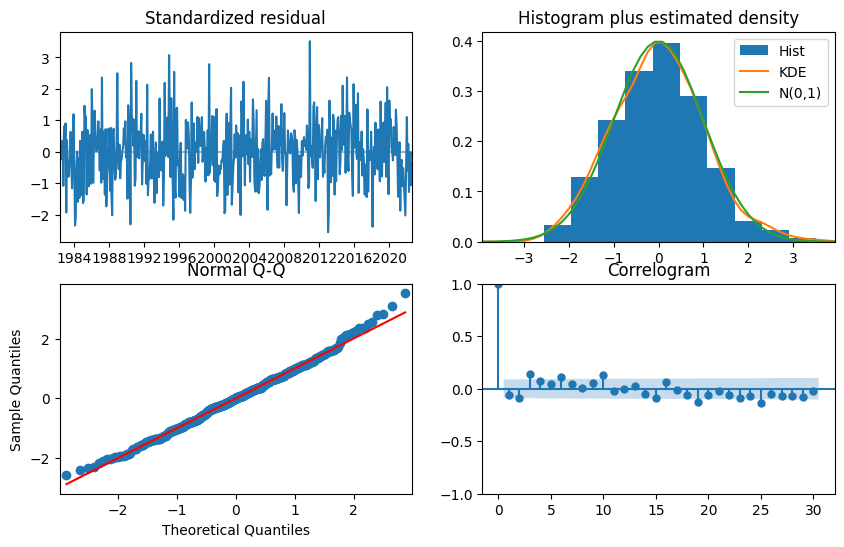

In [120]:
#Analisis Sisaan Model
result.plot_diagnostics(figsize=(10,6), lags=30)
plt.show()

In [121]:
print(f'Uji heteroskedastisitas: ',het_arch(result.resid, nlags=30)[1])
print(f'Uji Autokorelasi: ',runstest_1samp(result.resid, correction=False)[1])
print(f'Uji Normalitas: ',jarque_bera(result.resid)[1])

Uji heteroskedastisitas:  0.4765948455152754
Uji Autokorelasi:  0.23663489343669586
Uji Normalitas:  0.17209623533539764


In [122]:
from statsmodels.tsa.stattools import coint

print(f"P-value uji kointegrasi (Engle-Granger): {coint(train['total_deposit'], train['inflation_rate'])[1]}")

P-value uji kointegrasi (Engle-Granger): 0.9861024720914474


Jika p-value<0.05 maka ada kointegrasi (hubungan jangka panjang). Jika terdapat kointegrasi, maka pemodelan dapat dilanjutkan ke ECM (Error Correction Model) untuk mengakomodir hubungan jangka panjang dalam data.

In [123]:
# Prediksi
forecast = result.forecast(steps=12, exog=test[['inflation_rate']])

# Tampilkan hasil prediksi
print(forecast)

2022-09-01    365.687256
2022-10-01    329.074069
2022-11-01    316.198025
2022-12-01    337.299378
2023-01-01    324.140937
2023-02-01    332.293717
2023-03-01    359.334325
2023-04-01    333.039358
2023-05-01    326.765998
2023-06-01    360.117994
2023-07-01    362.866673
2023-08-01    366.120197
Freq: MS, dtype: float64


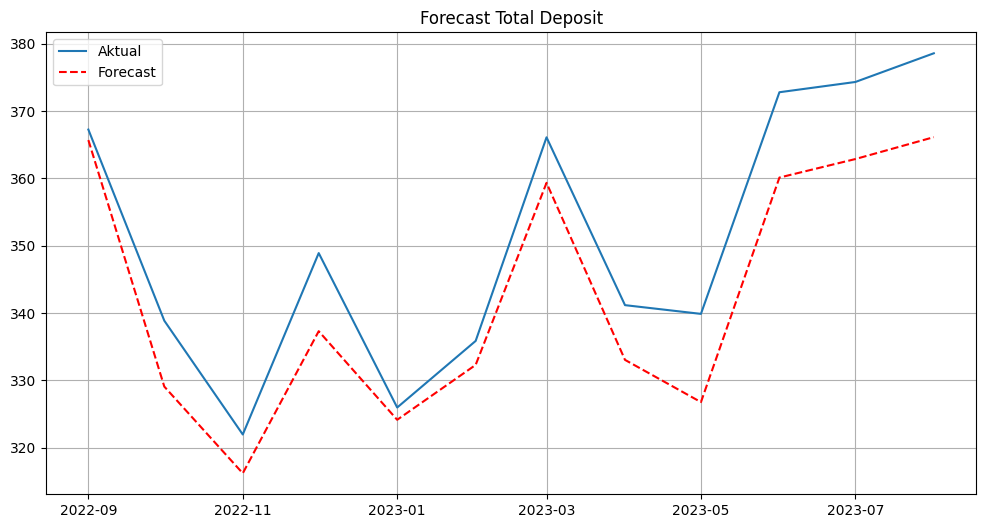

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(test['total_deposit'], label='Aktual')
plt.plot(forecast, label='Forecast', color='red', linestyle='--')
plt.title('Forecast Total Deposit')
plt.legend()
plt.grid(True)
plt.show()

In [125]:
print('MAPE: ',mean_absolute_percentage_error(test['total_deposit'],forecast)*100, '%')
print('MSE: ',mean_squared_error(test['total_deposit'],forecast))
print('MAE: ',mean_absolute_error(test['total_deposit'],forecast))

MAPE:  2.3234261189519474 %
MSE:  84.36692044892702
MAE:  8.222313056843253


## Pemodelan Multivariate: VAR

VAR digunakan jika Tidak ada target utama, semua variabel diperlakukan sama (semua jadi endogen).

In [126]:
train, test=data_ardl[:-12], data_ardl[-12:]

In [127]:
print('p-value uji ADF inflation rate= ', adfuller(train['inflation_rate'])[1])
print('p-value uji ADF Total Deposit= ',adfuller(train['total_deposit'])[1])

p-value uji ADF inflation rate=  0.0
p-value uji ADF Total Deposit=  0.9638640465204775


In [128]:
from statsmodels.tsa.stattools import coint

print(f"P-value uji kointegrasi (Engle-Granger): {coint(train['total_deposit'], train['inflation_rate'])[1]}")

P-value uji kointegrasi (Engle-Granger): 0.9861024720914474


Karena tidak ada kointegrasi maka lanjut ke pemodelan VAR

In [129]:
train['total_deposit_diff']=train['total_deposit'].diff()

In [130]:
train_var=train.dropna()

In [131]:
train_var.head()

,total_deposit,inflation_rate,monthly_profit,total_loan,exchange_rate,total_deposit_diff
date,,,,,,
1982-02-01,78.906068,2.458521,17.244071,44.992066,1.370821,4.150499
1982-03-01,84.774546,2.694307,15.909006,43.707226,1.354560,5.868478
1982-04-01,79.402789,2.956909,19.983128,43.391303,1.282112,-5.371758
1982-05-01,63.571381,2.429754,19.149077,39.904074,1.115082,-15.831408
1982-06-01,81.724266,2.429759,17.733860,40.630661,1.000000,18.152885


In [132]:
from statsmodels.tsa.api import VAR
model = VAR(train_var[['total_deposit','inflation_rate']])
lag_selection = model.select_order(maxlags=10)
print(lag_selection.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        6.517       6.534       676.2       6.523
1        2.502       2.554       12.20       2.522
2        2.165       2.252       8.715       2.199
3       0.7475      0.8699       2.112      0.7956
4       0.6191     0.7764*       1.857     0.6810*
5       0.6250      0.8172       1.868      0.7006
6       0.6261      0.8533       1.870      0.7154
7       0.6179      0.8800       1.855      0.7210
8       0.6334      0.9305       1.884      0.7502
9      0.6144*      0.9464      1.849*      0.7449
10      0.6218      0.9887       1.862      0.7660
--------------------------------------------------


In [133]:
var_model = model.fit(4)

print(var_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 28, May, 2025
Time:                     05:10:28
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.763386
Nobs:                     483.000    HQIC:                  0.668826
Log likelihood:          -1499.43    FPE:                    1.83605
AIC:                     0.607609    Det(Omega_mle):         1.76949
--------------------------------------------------------------------
Results for equation total_deposit
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.579814         4.400761            0.132           0.895
L1.total_deposit          0.571542         0.042776           13.361           0.000
L1.inflation_rate       -49.775138  

In [134]:
# Uji asumsi white noise
white_test = var_model.test_whiteness(nlags=12, signif=0.05, adjusted=False)
print(white_test.summary())

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 12 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         59.09          46.19   0.002 32
----------------------------------------


In [135]:
print(var_model.test_normality())

<statsmodels.tsa.vector_ar.hypothesis_test_results.NormalityTestResults object. H_0: data generated by normally-distributed process: reject at 5% significance level. Test statistic: 10.148, critical value: 9.488>, p-value: 0.038>


# Sesi 2 : Model Deep Learning untuk Forecasting

## Forecasting Data Deret Waktu

In [136]:
url_data_ts = '/content/pelatihanTS/data_modeling1.xlsx'
data_ts=pd.read_excel(url_data_ts)

In [137]:
data_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  500 non-null    datetime64[ns]
 1   total_deposit         500 non-null    float64       
 2   inflation_rate        500 non-null    float64       
 3   monthly_profit        500 non-null    float64       
 4   interest_rate         500 non-null    float64       
 5   unemployment_rate     500 non-null    float64       
 6   gdp_growth            500 non-null    float64       
 7   customer_count        500 non-null    float64       
 8   digital_transactions  500 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 35.3 KB


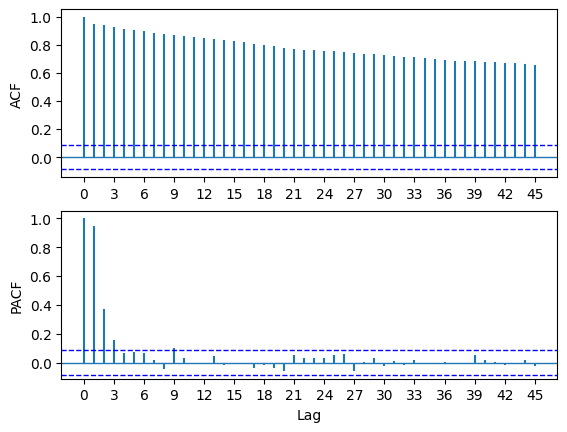

In [138]:
acf_pacf_fig(data_ts['total_deposit'], both=True, lag=45)

In [139]:
df_ml_ts=pd.DataFrame(data_ts['total_deposit'].copy())
df_ml_ts.columns=['Yt']

# Tentukan berapa banyak lag yang ingin digunakan
n_lags = 3  # contoh: lag 1, lag 2, lag 3

# Buat dataframe baru dengan lag
for i in range(1, n_lags + 1):
    df_ml_ts[f'X{i}'] = df_ml_ts['Yt'].shift(i)

In [140]:
df_ml_ts.head()

,Yt,X1,X2,X3
0,120.897367,NaN,NaN,NaN
1,121.998352,120.897367,NaN,NaN
2,119.250061,121.998352,120.897367,NaN
3,123.014362,119.250061,121.998352,120.897367
4,122.297150,123.014362,119.250061,121.998352


In [141]:
df_new = df_ml_ts.dropna()
df_new.head()

,Yt,X1,X2,X3
3,123.014362,119.250061,121.998352,120.897367
4,122.297150,123.014362,119.250061,121.998352
5,122.037803,122.297150,123.014362,119.250061
6,123.167097,122.037803,122.297150,123.014362
7,124.378347,123.167097,122.037803,122.297150


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

In [143]:
# Penyiapan data untuk pemodelan
train=df_new[:-50]
test=df_new[-50:]

X_train,y_train=np.array(train.drop('Yt', axis=1)), np.array(train['Yt'])
X_test,y_test=np.array(test.drop('Yt', axis=1)), np.array(test['Yt'])

# Penskalaan data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1))

# Ubah shape agar cocok untuk RNN input: (samples, timesteps, features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [144]:
# RNN Model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='tanh', input_shape=(3, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mse')

# Train
model_rnn.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, verbose=2)


Epoch 1/50
14/14 - 2s - 118ms/step - loss: 0.0144
Epoch 2/50
14/14 - 0s - 5ms/step - loss: 0.0057
Epoch 3/50
14/14 - 0s - 10ms/step - loss: 0.0039
Epoch 4/50
14/14 - 0s - 5ms/step - loss: 0.0038
Epoch 5/50
14/14 - 0s - 5ms/step - loss: 0.0037
Epoch 6/50
14/14 - 0s - 10ms/step - loss: 0.0037
Epoch 7/50
14/14 - 0s - 5ms/step - loss: 0.0037
Epoch 8/50
14/14 - 0s - 10ms/step - loss: 0.0037
Epoch 9/50
14/14 - 0s - 5ms/step - loss: 0.0039
Epoch 10/50
14/14 - 0s - 5ms/step - loss: 0.0040
Epoch 11/50
14/14 - 0s - 5ms/step - loss: 0.0039
Epoch 12/50
14/14 - 0s - 5ms/step - loss: 0.0037
Epoch 13/50
14/14 - 0s - 10ms/step - loss: 0.0039
Epoch 14/50
14/14 - 0s - 10ms/step - loss: 0.0040
Epoch 15/50
14/14 - 0s - 10ms/step - loss: 0.0037
Epoch 16/50
14/14 - 0s - 5ms/step - loss: 0.0038
Epoch 17/50
14/14 - 0s - 5ms/step - loss: 0.0037
Epoch 18/50
14/14 - 0s - 6ms/step - loss: 0.0036
Epoch 19/50
14/14 - 0s - 8ms/step - loss: 0.0036
Epoch 20/50
14/14 - 0s - 5ms/step - loss: 0.0037
Epoch 21/50
14/14 - 0

In [145]:
# LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='tanh', input_shape=(3, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Train
model_lstm.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
14/14 - 2s - 133ms/step - loss: 0.1065
Epoch 2/50
14/14 - 0s - 7ms/step - loss: 0.0276
Epoch 3/50
14/14 - 0s - 9ms/step - loss: 0.0123
Epoch 4/50
14/14 - 0s - 10ms/step - loss: 0.0099
Epoch 5/50
14/14 - 0s - 10ms/step - loss: 0.0079
Epoch 6/50
14/14 - 0s - 10ms/step - loss: 0.0067
Epoch 7/50
14/14 - 0s - 10ms/step - loss: 0.0055
Epoch 8/50
14/14 - 0s - 6ms/step - loss: 0.0048
Epoch 9/50
14/14 - 0s - 6ms/step - loss: 0.0043
Epoch 10/50
14/14 - 0s - 11ms/step - loss: 0.0040
Epoch 11/50
14/14 - 0s - 6ms/step - loss: 0.0039
Epoch 12/50
14/14 - 0s - 6ms/step - loss: 0.0038
Epoch 13/50
14/14 - 0s - 6ms/step - loss: 0.0038
Epoch 14/50
14/14 - 0s - 6ms/step - loss: 0.0038
Epoch 15/50
14/14 - 0s - 6ms/step - loss: 0.0038
Epoch 16/50
14/14 - 0s - 10ms/step - loss: 0.0038
Epoch 17/50
14/14 - 0s - 6ms/step - loss: 0.0038
Epoch 18/50
14/14 - 0s - 5ms/step - loss: 0.0038
Epoch 19/50
14/14 - 0s - 6ms/step - loss: 0.0038
Epoch 20/50
14/14 - 0s - 10ms/step - loss: 0.0038
Epoch 21/50
14/14 - 

In [146]:
# GRU Model
model_gru = Sequential()
model_gru.add(GRU(50, activation='tanh', input_shape=(3, 1)))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')

# Train
model_gru.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
14/14 - 2s - 152ms/step - loss: 0.0835
Epoch 2/50
14/14 - 0s - 10ms/step - loss: 0.0180
Epoch 3/50
14/14 - 0s - 12ms/step - loss: 0.0144
Epoch 4/50
14/14 - 0s - 11ms/step - loss: 0.0095
Epoch 5/50
14/14 - 0s - 10ms/step - loss: 0.0073
Epoch 6/50
14/14 - 0s - 10ms/step - loss: 0.0056
Epoch 7/50
14/14 - 0s - 9ms/step - loss: 0.0046
Epoch 8/50
14/14 - 0s - 10ms/step - loss: 0.0040
Epoch 9/50
14/14 - 0s - 10ms/step - loss: 0.0039
Epoch 10/50
14/14 - 0s - 9ms/step - loss: 0.0038
Epoch 11/50
14/14 - 0s - 9ms/step - loss: 0.0038
Epoch 12/50
14/14 - 0s - 9ms/step - loss: 0.0038
Epoch 13/50
14/14 - 0s - 10ms/step - loss: 0.0038
Epoch 14/50
14/14 - 0s - 10ms/step - loss: 0.0038
Epoch 15/50
14/14 - 0s - 9ms/step - loss: 0.0038
Epoch 16/50
14/14 - 0s - 9ms/step - loss: 0.0038
Epoch 17/50
14/14 - 0s - 9ms/step - loss: 0.0038
Epoch 18/50
14/14 - 0s - 9ms/step - loss: 0.0039
Epoch 19/50
14/14 - 0s - 9ms/step - loss: 0.0038
Epoch 20/50
14/14 - 0s - 9ms/step - loss: 0.0038
Epoch 21/50
14/14 

In [147]:
# Prediksi
y_pred_scaled_rnn = model_rnn.predict(X_test_scaled)
y_pred_scaled_lstm = model_lstm.predict(X_test_scaled)
y_pred_scaled_gru = model_gru.predict(X_test_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


In [148]:
# Balikkan skala ke bentuk asli
y_pred_rnn = scaler_y.inverse_transform(y_pred_scaled_rnn)
y_pred_lstm = scaler_y.inverse_transform(y_pred_scaled_lstm)
y_pred_gru = scaler_y.inverse_transform(y_pred_scaled_gru)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)

In [149]:
pd.DataFrame({'Model':['RNN','LSTM','GRU'],
              'MAPE':[mean_absolute_percentage_error(y_pred_rnn, y_test_inv)*100,
                      mean_absolute_percentage_error(y_pred_lstm, y_test_inv)*100,
                      mean_absolute_percentage_error(y_pred_gru, y_test_inv)*100],
              'MSE':[mean_squared_error(y_pred_rnn, y_test_inv),
                      mean_squared_error(y_pred_lstm, y_test_inv),
                      mean_squared_error(y_pred_gru, y_test_inv)],
              'MAE':[mean_absolute_error(y_pred_rnn, y_test_inv),
                      mean_absolute_error(y_pred_lstm, y_test_inv),
                      mean_absolute_error(y_pred_gru, y_test_inv)]})

,Model,MAPE,MSE,MAE
0,RNN,2.376985,13.492182,2.995491
1,LSTM,2.291685,13.949793,2.862905
2,GRU,2.289822,13.781691,2.879700


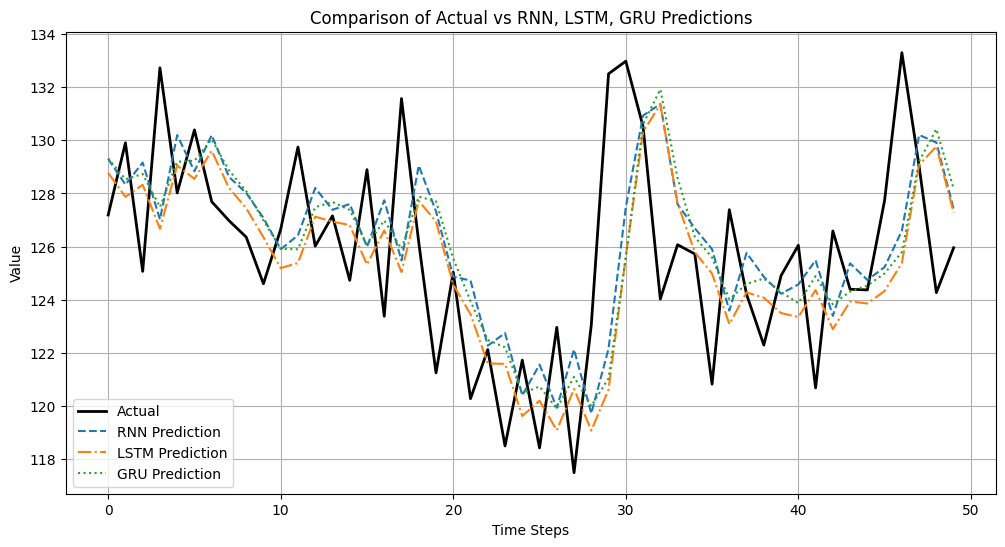

In [150]:
plt.figure(figsize=(12,6))

plt.plot(y_test_inv, label='Actual', color='black', linewidth=2)
plt.plot(y_pred_rnn, label='RNN Prediction', linestyle='--')
plt.plot(y_pred_lstm, label='LSTM Prediction', linestyle='-.')
plt.plot(y_pred_gru, label='GRU Prediction', linestyle=':')

plt.title('Comparison of Actual vs RNN, LSTM, GRU Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()